# Sentiment Classification


## Loading the dataset

In [3]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)
import numpy as np

E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

1.14.0
2.3.1


E:\Anaconda\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWarning: Passing (type, 1) or '1type' 

In [4]:
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 300  #number of word used from each review

In [5]:
from keras.datasets import imdb

vocab_size = 10000 #vocab size

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size) # vocab_size is no.of words to consider from the dataset, ordering based on frequency.

## Train test split

In [6]:
#load dataset as a list of ints
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train1=x_train
y_train1=y_train
#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test =  pad_sequences(x_test, maxlen=maxlen)

In [7]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1], dtype=int64), array([12500, 12500], dtype=int64))
(array([0, 1], dtype=int64), array([12500, 12500], dtype=int64))


Hence, the positive and negative reviews are equally distributed

In [8]:
word_index = tf.keras.datasets.imdb.get_word_index(
    path='imdb_word_index.json'
)

In [9]:
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2  # unknown
word_index['<UNUSED>'] = 3
reverse_word_index = dict((value, key) for (key, value) in word_index.items())

In [10]:
word_array1=list((reverse_word_index))
word_array=np.array(list((reverse_word_index)))

In [11]:
print("index","\t","word")
for i in range(word_array.size):
    print(i, "\t",reverse_word_index[i])

index 	 word
0 	 <PAD>
1 	 <START>
2 	 <UNK>
3 	 <UNUSED>
4 	 the
5 	 and
6 	 a
7 	 of
8 	 to
9 	 is
10 	 br
11 	 in
12 	 it
13 	 i
14 	 this
15 	 that
16 	 was
17 	 as
18 	 for
19 	 with
20 	 movie
21 	 but
22 	 film
23 	 on
24 	 not
25 	 you
26 	 are
27 	 his
28 	 have
29 	 he
30 	 be
31 	 one
32 	 all
33 	 at
34 	 by
35 	 an
36 	 they
37 	 who
38 	 so
39 	 from
40 	 like
41 	 her
42 	 or
43 	 just
44 	 about
45 	 it's
46 	 out
47 	 has
48 	 if
49 	 some
50 	 there
51 	 what
52 	 good
53 	 more
54 	 when
55 	 very
56 	 up
57 	 no
58 	 time
59 	 she
60 	 even
61 	 my
62 	 would
63 	 which
64 	 only
65 	 story
66 	 really
67 	 see
68 	 their
69 	 had
70 	 can
71 	 were
72 	 me
73 	 well
74 	 than
75 	 we
76 	 much
77 	 been
78 	 bad
79 	 get
80 	 will
81 	 do
82 	 also
83 	 into
84 	 people
85 	 other
86 	 first
87 	 great
88 	 because
89 	 how
90 	 him
91 	 most
92 	 don't
93 	 made
94 	 its
95 	 then
96 	 way
97 	 make
98 	 them
99 	 too
100 	 could
101 	 any
102 	 movies
103 	 after

818 	 buy
819 	 material
820 	 somehow
821 	 realistic
822 	 figure
823 	 crime
824 	 doubt
825 	 gone
826 	 peter
827 	 tom
828 	 kept
829 	 viewing
830 	 t
831 	 general
832 	 leads
833 	 greatest
834 	 space
835 	 lame
836 	 suspense
837 	 dance
838 	 imagine
839 	 brought
840 	 third
841 	 atmosphere
842 	 hear
843 	 particular
844 	 sequences
845 	 whatever
846 	 parents
847 	 move
848 	 lee
849 	 indeed
850 	 learn
851 	 rent
852 	 de
853 	 eventually
854 	 note
855 	 deal
856 	 average
857 	 reviews
858 	 wait
859 	 forget
860 	 japanese
861 	 sexual
862 	 poorly
863 	 premise
864 	 okay
865 	 zombie
866 	 surprise
867 	 believable
868 	 stage
869 	 possibly
870 	 sit
871 	 who's
872 	 decided
873 	 expected
874 	 you've
875 	 subject
876 	 nature
877 	 became
878 	 difficult
879 	 free
880 	 killing
881 	 screenplay
882 	 truth
883 	 romance
884 	 dr
885 	 nor
886 	 reading
887 	 needed
888 	 question
889 	 leaves
890 	 street
891 	 20
892 	 meets
893 	 hot
894 	 unless
895 	 b

1651 	 struggle
1652 	 queen
1653 	 redeeming
1654 	 stone
1655 	 jason
1656 	 scientist
1657 	 p
1658 	 wearing
1659 	 ed
1660 	 stephen
1661 	 compare
1662 	 castle
1663 	 intelligence
1664 	 creature
1665 	 cross
1666 	 sleep
1667 	 teenage
1668 	 allowed
1669 	 wonderfully
1670 	 necessary
1671 	 carry
1672 	 drugs
1673 	 40
1674 	 tears
1675 	 fox
1676 	 criminal
1677 	 rip
1678 	 helped
1679 	 member
1680 	 desperate
1681 	 moved
1682 	 sight
1683 	 cgi
1684 	 trust
1685 	 deeply
1686 	 roll
1687 	 includes
1688 	 willing
1689 	 whatsoever
1690 	 disaster
1691 	 12
1692 	 machine
1693 	 ship
1694 	 treat
1695 	 began
1696 	 mid
1697 	 uncle
1698 	 grace
1699 	 phone
1700 	 70's
1701 	 williams
1702 	 commentary
1703 	 build
1704 	 accident
1705 	 captain
1706 	 realized
1707 	 plane
1708 	 energy
1709 	 station
1710 	 warning
1711 	 epic
1712 	 davis
1713 	 rarely
1714 	 humans
1715 	 loving
1716 	 theatre
1717 	 comedic
1718 	 witch
1719 	 pop
1720 	 suicide
1721 	 dying
1722 	 

2485 	 weeks
2486 	 prime
2487 	 crash
2488 	 cant
2489 	 professor
2490 	 experiences
2491 	 speech
2492 	 print
2493 	 lesbian
2494 	 harsh
2495 	 deadly
2496 	 veteran
2497 	 mistakes
2498 	 edward
2499 	 routine
2500 	 whoever
2501 	 notch
2502 	 uninteresting
2503 	 realizes
2504 	 invisible
2505 	 combined
2506 	 sympathy
2507 	 accidentally
2508 	 kim
2509 	 twisted
2510 	 brave
2511 	 colors
2512 	 dollars
2513 	 security
2514 	 draw
2515 	 dogs
2516 	 nude
2517 	 rain
2518 	 universe
2519 	 struggling
2520 	 dozen
2521 	 teens
2522 	 convince
2523 	 guilty
2524 	 path
2525 	 appreciated
2526 	 atrocious
2527 	 mountain
2528 	 treasure
2529 	 walked
2530 	 columbo
2531 	 irish
2532 	 frightening
2533 	 would've
2534 	 committed
2535 	 aliens
2536 	 technically
2537 	 recognize
2538 	 cowboy
2539 	 blah
2540 	 birth
2541 	 enter
2542 	 gritty
2543 	 enemy
2544 	 aka
2545 	 spy
2546 	 changing
2547 	 magical
2548 	 anderson
2549 	 princess
2550 	 department
2551 	 gas
2552 	 occa

3332 	 pat
3333 	 24
3334 	 stanwyck
3335 	 colour
3336 	 teach
3337 	 dorothy
3338 	 roberts
3339 	 rocks
3340 	 fest
3341 	 spell
3342 	 catherine
3343 	 dealt
3344 	 stan
3345 	 fitting
3346 	 hitting
3347 	 striking
3348 	 pro
3349 	 2005
3350 	 tribute
3351 	 tricks
3352 	 60s
3353 	 battles
3354 	 believing
3355 	 briefly
3356 	 countless
3357 	 fashioned
3358 	 loser
3359 	 goal
3360 	 gothic
3361 	 noise
3362 	 techniques
3363 	 n
3364 	 videos
3365 	 health
3366 	 thumbs
3367 	 attempted
3368 	 scientists
3369 	 st
3370 	 painting
3371 	 baker
3372 	 strikes
3373 	 inspiring
3374 	 huh
3375 	 sexually
3376 	 birthday
3377 	 secretary
3378 	 curtis
3379 	 jeremy
3380 	 covers
3381 	 pointed
3382 	 slight
3383 	 specific
3384 	 tea
3385 	 hearts
3386 	 unintentionally
3387 	 denzel
3388 	 horrendous
3389 	 charismatic
3390 	 silver
3391 	 surrounded
3392 	 surrounding
3393 	 reactions
3394 	 branagh
3395 	 importance
3396 	 rochester
3397 	 admittedly
3398 	 carefully
3399 	 jer

4168 	 satan
4169 	 hates
4170 	 devoid
4171 	 impress
4172 	 outer
4173 	 generic
4174 	 dutch
4175 	 punk
4176 	 lyrics
4177 	 yellow
4178 	 eastwood
4179 	 exotic
4180 	 represent
4181 	 instant
4182 	 desperation
4183 	 mixture
4184 	 settle
4185 	 frustration
4186 	 unfolds
4187 	 goodness
4188 	 wives
4189 	 directs
4190 	 fetched
4191 	 ape
4192 	 cheating
4193 	 dozens
4194 	 rebel
4195 	 cuba
4196 	 paulie
4197 	 enormous
4198 	 revolutionary
4199 	 hints
4200 	 shelf
4201 	 brooklyn
4202 	 florida
4203 	 dances
4204 	 motives
4205 	 destiny
4206 	 1999
4207 	 donna
4208 	 hardcore
4209 	 mill
4210 	 wrestling
4211 	 subtlety
4212 	 forty
4213 	 describes
4214 	 drops
4215 	 blake
4216 	 stinker
4217 	 doll
4218 	 painted
4219 	 fond
4220 	 linda
4221 	 principal
4222 	 rank
4223 	 ideal
4224 	 kennedy
4225 	 hammer
4226 	 montage
4227 	 hollywood's
4228 	 tie
4229 	 disjointed
4230 	 3rd
4231 	 reaches
4232 	 amy
4233 	 immensely
4234 	 ginger
4235 	 judging
4236 	 companion


4963 	 definition
4964 	 testament
4965 	 educational
4966 	 survivor
4967 	 attend
4968 	 clip
4969 	 contest
4970 	 petty
4971 	 13th
4972 	 christy
4973 	 respected
4974 	 resist
4975 	 year's
4976 	 album
4977 	 expressed
4978 	 randy
4979 	 quit
4980 	 phony
4981 	 unoriginal
4982 	 punishment
4983 	 activities
4984 	 suspend
4985 	 rolled
4986 	 eastern
4987 	 1933
4988 	 instinct
4989 	 distinct
4990 	 championship
4991 	 tech
4992 	 doubts
4993 	 interests
4994 	 exposure
4995 	 travesty
4996 	 israel
4997 	 sixties
4998 	 pink
4999 	 orange
5000 	 resulting
5001 	 spain
5002 	 bergman
5003 	 1987
5004 	 verhoeven
5005 	 distribution
5006 	 laughably
5007 	 depicting
5008 	 kissing
5009 	 tooth
5010 	 shed
5011 	 kubrick
5012 	 pin
5013 	 nonsensical
5014 	 roots
5015 	 assumed
5016 	 swim
5017 	 whoopi
5018 	 domino
5019 	 heights
5020 	 spock
5021 	 inevitably
5022 	 abraham
5023 	 stunned
5024 	 businessman
5025 	 correctly
5026 	 deceased
5027 	 buffalo
5028 	 wholly
5029 	

5791 	 boston
5792 	 ingenious
5793 	 flowers
5794 	 harold
5795 	 feeding
5796 	 eternity
5797 	 norm
5798 	 sharing
5799 	 meg
5800 	 quinn
5801 	 election
5802 	 camcorder
5803 	 limit
5804 	 genie
5805 	 daniels
5806 	 quaid
5807 	 bacon
5808 	 runner
5809 	 tierney
5810 	 champion
5811 	 stallone
5812 	 minister
5813 	 publicity
5814 	 static
5815 	 springer
5816 	 info
5817 	 screw
5818 	 inhabitants
5819 	 '70s
5820 	 renaissance
5821 	 carla
5822 	 screwed
5823 	 delicate
5824 	 marlon
5825 	 weather
5826 	 deserving
5827 	 incidentally
5828 	 depends
5829 	 winchester
5830 	 boyle
5831 	 gina
5832 	 immature
5833 	 lift
5834 	 wings
5835 	 partners
5836 	 rope
5837 	 ace
5838 	 phillips
5839 	 kathryn
5840 	 elite
5841 	 pete
5842 	 brother's
5843 	 glamorous
5844 	 transformed
5845 	 blatantly
5846 	 symbolic
5847 	 traffic
5848 	 belt
5849 	 strings
5850 	 excess
5851 	 stalker
5852 	 smiles
5853 	 ton
5854 	 politician
5855 	 keen
5856 	 esther
5857 	 ambition
5858 	 surger

6612 	 corbett
6613 	 shepherd
6614 	 reports
6615 	 expectation
6616 	 sophie
6617 	 sentimentality
6618 	 pause
6619 	 sidewalk
6620 	 karate
6621 	 quantum
6622 	 intricate
6623 	 tax
6624 	 scarface
6625 	 crippled
6626 	 longing
6627 	 nbc
6628 	 reeve
6629 	 vintage
6630 	 crown
6631 	 1998
6632 	 quentin
6633 	 obsessive
6634 	 immense
6635 	 knocks
6636 	 bounty
6637 	 indiana
6638 	 adaption
6639 	 delighted
6640 	 er
6641 	 naschy
6642 	 liam
6643 	 establish
6644 	 addiction
6645 	 europeans
6646 	 tool
6647 	 stroke
6648 	 overblown
6649 	 goldblum
6650 	 jaded
6651 	 pursue
6652 	 sucker
6653 	 slip
6654 	 theories
6655 	 rookie
6656 	 havoc
6657 	 1953
6658 	 anticipated
6659 	 dukes
6660 	 principle
6661 	 voyage
6662 	 gamera
6663 	 swearing
6664 	 unsatisfying
6665 	 wonderland
6666 	 frontier
6667 	 parallels
6668 	 crashing
6669 	 downs
6670 	 incorrect
6671 	 erika
6672 	 aggressive
6673 	 divine
6674 	 paula
6675 	 dashing
6676 	 turmoil
6677 	 suspected
6678 	 aid

7462 	 eli
7463 	 occult
7464 	 joking
7465 	 ol'
7466 	 graduate
7467 	 beckinsale
7468 	 nuanced
7469 	 homicidal
7470 	 addressed
7471 	 evans
7472 	 lunatic
7473 	 parrot
7474 	 edith
7475 	 revival
7476 	 convict
7477 	 ignores
7478 	 safely
7479 	 plate
7480 	 sour
7481 	 turkish
7482 	 favourites
7483 	 ajay
7484 	 boundaries
7485 	 northam
7486 	 profile
7487 	 russ
7488 	 skeptical
7489 	 frog
7490 	 invested
7491 	 repeats
7492 	 bias
7493 	 '60s
7494 	 drowned
7495 	 iq
7496 	 diversity
7497 	 outlandish
7498 	 nightmarish
7499 	 dynamite
7500 	 unfolding
7501 	 convent
7502 	 clooney
7503 	 observations
7504 	 johansson
7505 	 1955
7506 	 enchanting
7507 	 tire
7508 	 stabbing
7509 	 disco
7510 	 excellence
7511 	 27
7512 	 clunky
7513 	 valid
7514 	 array
7515 	 engine
7516 	 sammo
7517 	 doug
7518 	 sly
7519 	 interior
7520 	 resolve
7521 	 hating
7522 	 olsen
7523 	 interviewed
7524 	 chong
7525 	 protection
7526 	 maximum
7527 	 nauseating
7528 	 versa
7529 	 apocalypse

8374 	 inform
8375 	 cursed
8376 	 retro
8377 	 250
8378 	 malden
8379 	 cody
8380 	 spelled
8381 	 manic
8382 	 labeled
8383 	 perverse
8384 	 collector
8385 	 drain
8386 	 shelter
8387 	 spade
8388 	 fallon
8389 	 ang
8390 	 gino
8391 	 kareena
8392 	 depardieu
8393 	 apollo
8394 	 officially
8395 	 playful
8396 	 informer
8397 	 banks
8398 	 retirement
8399 	 booth
8400 	 replacing
8401 	 transforms
8402 	 surrender
8403 	 shield
8404 	 jigsaw
8405 	 fiend
8406 	 predecessors
8407 	 judgement
8408 	 bing
8409 	 englund
8410 	 ads
8411 	 damsel
8412 	 stirring
8413 	 structured
8414 	 patty
8415 	 poet
8416 	 signature
8417 	 tolerance
8418 	 bites
8419 	 dash
8420 	 seriousness
8421 	 casted
8422 	 mercifully
8423 	 edison
8424 	 advances
8425 	 padded
8426 	 czech
8427 	 lingering
8428 	 sensational
8429 	 crowded
8430 	 bigfoot
8431 	 captive
8432 	 plotted
8433 	 premiered
8434 	 dictator
8435 	 locale
8436 	 bastard
8437 	 manga
8438 	 fighters
8439 	 sophistication
8440 	 lifts

9201 	 peterson
9202 	 jock
9203 	 rizzo
9204 	 kalifornia
9205 	 mcdermott
9206 	 versatile
9207 	 400
9208 	 michael's
9209 	 naval
9210 	 burden
9211 	 cheung
9212 	 largest
9213 	 culkin
9214 	 retelling
9215 	 muted
9216 	 leaps
9217 	 theo
9218 	 passive
9219 	 bucket
9220 	 pertwee
9221 	 eddy
9222 	 rapture
9223 	 continuous
9224 	 gage
9225 	 stretches
9226 	 giggle
9227 	 marx
9228 	 concludes
9229 	 stalks
9230 	 amok
9231 	 adequately
9232 	 melt
9233 	 stature
9234 	 counted
9235 	 borderline
9236 	 mastermind
9237 	 boxes
9238 	 posh
9239 	 taker
9240 	 counterpart
9241 	 izzard
9242 	 straw
9243 	 toe
9244 	 shamelessly
9245 	 crenna
9246 	 tango
9247 	 pour
9248 	 behaves
9249 	 sematary
9250 	 expand
9251 	 azumi
9252 	 country's
9253 	 stimulating
9254 	 grady
9255 	 expressing
9256 	 payne
9257 	 crass
9258 	 intellect
9259 	 booker
9260 	 dani
9261 	 parents'
9262 	 lotr
9263 	 miyazaki's
9264 	 wits
9265 	 waving
9266 	 traumatized
9267 	 illiterate
9268 	 chan's
9

10043 	 misfits
10044 	 unsuccessful
10045 	 amusingly
10046 	 coincidences
10047 	 lamarr
10048 	 astronauts
10049 	 logo
10050 	 calculated
10051 	 wai
10052 	 prehistoric
10053 	 groan
10054 	 delia
10055 	 socialist
10056 	 boarding
10057 	 pokes
10058 	 opponent
10059 	 jumbo
10060 	 arbitrary
10061 	 transform
10062 	 perfected
10063 	 abominable
10064 	 jeep
10065 	 hickock
10066 	 unremarkable
10067 	 orchestral
10068 	 amuse
10069 	 unnamed
10070 	 canon
10071 	 consisting
10072 	 rewind
10073 	 wheels
10074 	 1935
10075 	 elementary
10076 	 pianist
10077 	 addresses
10078 	 pursues
10079 	 orphanage
10080 	 liza
10081 	 gertrude
10082 	 hardships
10083 	 streisand's
10084 	 raping
10085 	 devastated
10086 	 baffled
10087 	 marjorie
10088 	 dane
10089 	 patch
10090 	 crowe
10091 	 zoo
10092 	 downward
10093 	 barman
10094 	 manor
10095 	 yikes
10096 	 grieving
10097 	 excrement
10098 	 sleepwalkers
10099 	 implications
10100 	 o'sullivan
10101 	 inspires
10102 	 surpassed
1010

10885 	 trashed
10886 	 ditto
10887 	 hams
10888 	 yacht
10889 	 telegraphed
10890 	 backbone
10891 	 democratic
10892 	 askey
10893 	 demanded
10894 	 uttered
10895 	 turturro
10896 	 farcical
10897 	 noon
10898 	 swayze
10899 	 tracey
10900 	 trinity
10901 	 increased
10902 	 irreverent
10903 	 metaphysical
10904 	 idealism
10905 	 denmark
10906 	 investigates
10907 	 mish
10908 	 unstoppable
10909 	 compromised
10910 	 helicopters
10911 	 townsend
10912 	 ably
10913 	 sparkle
10914 	 hoods
10915 	 6th
10916 	 newhart
10917 	 dial
10918 	 ingredient
10919 	 marley
10920 	 wellington
10921 	 sickly
10922 	 wanda
10923 	 exclusive
10924 	 telephone
10925 	 cringed
10926 	 speeding
10927 	 whoa
10928 	 911
10929 	 goldsworthy's
10930 	 wraps
10931 	 lana
10932 	 unwittingly
10933 	 bump
10934 	 renee
10935 	 cooler
10936 	 borg
10937 	 soooo
10938 	 noses
10939 	 naming
10940 	 losses
10941 	 handedly
10942 	 pollack
10943 	 threaten
10944 	 victim's
10945 	 confederate
10946 	 rathbone

11737 	 heroines
11738 	 signing
11739 	 fiona
11740 	 riddled
11741 	 guzman
11742 	 veronika
11743 	 worldly
11744 	 fatally
11745 	 disfigured
11746 	 idle
11747 	 devos
11748 	 printed
11749 	 busting
11750 	 dyer
11751 	 mendes
11752 	 cleverness
11753 	 heterosexual
11754 	 caged
11755 	 depravity
11756 	 sock
11757 	 leonardo
11758 	 lecherous
11759 	 englishman
11760 	 tick
11761 	 griffith's
11762 	 jonestown
11763 	 noel
11764 	 pod
11765 	 costner
11766 	 reprising
11767 	 unfolded
11768 	 wyatt
11769 	 appointed
11770 	 neill
11771 	 submitted
11772 	 fists
11773 	 stanwyck's
11774 	 janine
11775 	 mumbo
11776 	 inherit
11777 	 recreated
11778 	 bailey
11779 	 vary
11780 	 misunderstandings
11781 	 ozzy
11782 	 godmother
11783 	 proposes
11784 	 nadia
11785 	 luminous
11786 	 arresting
11787 	 jim's
11788 	 marching
11789 	 moran
11790 	 prominently
11791 	 martin's
11792 	 congress
11793 	 thespian
11794 	 capra
11795 	 ripe
11796 	 bewildered
11797 	 incorporated
11798 	 

12587 	 amaze
12588 	 ailing
12589 	 unexciting
12590 	 maugham
12591 	 goebbels
12592 	 boone
12593 	 csi
12594 	 nobility
12595 	 transformations
12596 	 google
12597 	 kazaam
12598 	 terrorized
12599 	 hearty
12600 	 attain
12601 	 fridge
12602 	 miklos
12603 	 decadent
12604 	 coastal
12605 	 bullock
12606 	 slaps
12607 	 outings
12608 	 serbs
12609 	 zucker
12610 	 rewards
12611 	 quartet
12612 	 mayer
12613 	 morbius
12614 	 dismissed
12615 	 singles
12616 	 underbelly
12617 	 erica
12618 	 sweaty
12619 	 alejandro
12620 	 schindler's
12621 	 abby
12622 	 tattoo
12623 	 tosses
12624 	 williams'
12625 	 pasted
12626 	 gratitude
12627 	 hogg
12628 	 o'clock
12629 	 logan's
12630 	 tropical
12631 	 mugging
12632 	 merciless
12633 	 hallam
12634 	 skagway
12635 	 brighter
12636 	 sway
12637 	 astor
12638 	 overplayed
12639 	 narrates
12640 	 photographic
12641 	 loosing
12642 	 impressionable
12643 	 pondering
12644 	 '30s
12645 	 hammered
12646 	 prizes
12647 	 louque
12648 	 hurric

13425 	 antwerp
13426 	 houseman
13427 	 spewing
13428 	 beatty's
13429 	 riots
13430 	 lipstick
13431 	 shriek
13432 	 risqué
13433 	 conjure
13434 	 90210
13435 	 summarized
13436 	 reserve
13437 	 dorff
13438 	 monitors
13439 	 ceases
13440 	 wentworth
13441 	 boorish
13442 	 tobacco
13443 	 objectively
13444 	 stifler
13445 	 kristen
13446 	 troop
13447 	 squalor
13448 	 dickens'
13449 	 bog
13450 	 dungeons
13451 	 enthusiast
13452 	 audiard
13453 	 lapd
13454 	 outtakes
13455 	 deft
13456 	 packing
13457 	 fooling
13458 	 thorough
13459 	 ahh
13460 	 emphasizes
13461 	 1929
13462 	 blackboard
13463 	 discrimination
13464 	 who'll
13465 	 pretext
13466 	 erroll
13467 	 versatility
13468 	 camerawork
13469 	 hairstyle
13470 	 puberty
13471 	 fingernails
13472 	 pioneers
13473 	 blasting
13474 	 giddy
13475 	 eddie's
13476 	 carolina
13477 	 champions
13478 	 lunacy
13479 	 codes
13480 	 efficiently
13481 	 famously
13482 	 marylee
13483 	 fundamentally
13484 	 experimentation
13485

14262 	 adversary
14263 	 rubble
14264 	 freakish
14265 	 greengrass
14266 	 massively
14267 	 kitten
14268 	 unravels
14269 	 triads
14270 	 somerset
14271 	 nary
14272 	 kat
14273 	 storylines
14274 	 smells
14275 	 gras
14276 	 refugees
14277 	 lungs
14278 	 humility
14279 	 butter
14280 	 tagline
14281 	 lows
14282 	 brained
14283 	 lease
14284 	 honors
14285 	 foreigners
14286 	 february
14287 	 master's
14288 	 swings
14289 	 puzzles
14290 	 tos
14291 	 announce
14292 	 hokum
14293 	 addicts
14294 	 karisma
14295 	 55
14296 	 dino
14297 	 posturing
14298 	 sarno
14299 	 lobby
14300 	 gargantuan
14301 	 drunks
14302 	 haley
14303 	 butchering
14304 	 ole
14305 	 romanticism
14306 	 veins
14307 	 rerun
14308 	 '70's
14309 	 originated
14310 	 objections
14311 	 hoechlin
14312 	 osama
14313 	 tier
14314 	 rama
14315 	 lan
14316 	 adolescence
14317 	 nit
14318 	 evidenced
14319 	 disparate
14320 	 lumbering
14321 	 wrecks
14322 	 calculating
14323 	 silverstone
14324 	 doubtless
1432

15100 	 cheapest
15101 	 appease
15102 	 bedknobs
15103 	 halperin
15104 	 cafeteria
15105 	 michell
15106 	 projector
15107 	 resonate
15108 	 unthinkable
15109 	 inventiveness
15110 	 candice
15111 	 tomboy
15112 	 rightful
15113 	 sic
15114 	 biehn
15115 	 unintelligent
15116 	 sophomore
15117 	 lori
15118 	 dreamer
15119 	 torrance
15120 	 validity
15121 	 yawning
15122 	 domineering
15123 	 slime
15124 	 lorenz
15125 	 nothingness
15126 	 henson
15127 	 announcement
15128 	 snail
15129 	 feud
15130 	 krabbe
15131 	 beatings
15132 	 phoned
15133 	 romantically
15134 	 scarf
15135 	 fellowship
15136 	 nominal
15137 	 negatively
15138 	 stint
15139 	 fares
15140 	 banker
15141 	 dancy
15142 	 babban
15143 	 abandonment
15144 	 withstand
15145 	 histrionic
15146 	 angered
15147 	 investigated
15148 	 boldly
15149 	 you'
15150 	 throughly
15151 	 sade
15152 	 businessmen
15153 	 immerse
15154 	 dissolves
15155 	 psychosis
15156 	 nam
15157 	 gammera
15158 	 alice's
15159 	 shen
15160 	

15952 	 nepotism
15953 	 anachronistic
15954 	 biographies
15955 	 likelihood
15956 	 pedigree
15957 	 arabia
15958 	 spout
15959 	 brushes
15960 	 peasants
15961 	 ugliest
15962 	 boxed
15963 	 landon
15964 	 descended
15965 	 sctv
15966 	 sanchez
15967 	 cortes
15968 	 penguins
15969 	 flirtatious
15970 	 yaphet
15971 	 podge
15972 	 kutcher
15973 	 nephews
15974 	 presenter
15975 	 tribulation
15976 	 champ
15977 	 rv
15978 	 dystopian
15979 	 slums
15980 	 saul
15981 	 slumming
15982 	 astray
15983 	 mime
15984 	 arden
15985 	 overview
15986 	 ta
15987 	 largo
15988 	 syberberg
15989 	 degraded
15990 	 tangible
15991 	 instalment
15992 	 asserts
15993 	 baptist
15994 	 bangkok
15995 	 scales
15996 	 tornadoes
15997 	 improvements
15998 	 unhappily
15999 	 trashing
16000 	 eliza
16001 	 jolt
16002 	 enabling
16003 	 armour
16004 	 inevitability
16005 	 gilley's
16006 	 duly
16007 	 cosmo
16008 	 womanizer
16009 	 courts
16010 	 diagnosis
16011 	 pusser
16012 	 ditch
16013 	 somethin

16880 	 fellas
16881 	 deathly
16882 	 clausen
16883 	 gabriele
16884 	 kristel
16885 	 marcy
16886 	 boasted
16887 	 madge
16888 	 macmahon
16889 	 gould
16890 	 annals
16891 	 snoozer
16892 	 australia's
16893 	 capably
16894 	 obsessions
16895 	 censor
16896 	 mishmash
16897 	 erendira
16898 	 seething
16899 	 grunts
16900 	 snot
16901 	 predominantly
16902 	 remastered
16903 	 cooked
16904 	 homoerotic
16905 	 highs
16906 	 ruse
16907 	 tediously
16908 	 thanked
16909 	 teamwork
16910 	 laconic
16911 	 nwa
16912 	 feathers
16913 	 kazan's
16914 	 aspires
16915 	 unemployment
16916 	 grades
16917 	 renamed
16918 	 sponge
16919 	 calamai
16920 	 holloway
16921 	 tumultuous
16922 	 prayers
16923 	 harshly
16924 	 delectable
16925 	 mallory
16926 	 treason
16927 	 isnt
16928 	 'black
16929 	 audacious
16930 	 lovemaking
16931 	 pours
16932 	 pleases
16933 	 vortex
16934 	 gabrielle
16935 	 hurl
16936 	 urbane
16937 	 milligan
16938 	 boreanaz
16939 	 gauge
16940 	 persecution
16941 	 d

17641 	 grasping
17642 	 fueled
17643 	 realisation
17644 	 affords
17645 	 discerning
17646 	 etcetera
17647 	 dismemberment
17648 	 welcomes
17649 	 romps
17650 	 telescope
17651 	 monopoly
17652 	 lanisha
17653 	 dismisses
17654 	 sceneries
17655 	 saucy
17656 	 everytime
17657 	 hayao
17658 	 crescendo
17659 	 erich
17660 	 quarry
17661 	 brew
17662 	 scotty
17663 	 richest
17664 	 tramell
17665 	 runt
17666 	 gears
17667 	 emy
17668 	 selfless
17669 	 whereby
17670 	 mic
17671 	 mazes
17672 	 infomercial
17673 	 heartstrings
17674 	 paige
17675 	 'til
17676 	 orgasm
17677 	 bernhard
17678 	 street'
17679 	 cultists
17680 	 tivo
17681 	 hurt's
17682 	 cooper's
17683 	 offscreen
17684 	 instinctively
17685 	 constitute
17686 	 controller
17687 	 goring
17688 	 rift
17689 	 blunders
17690 	 'all
17691 	 reviving
17692 	 jackets
17693 	 ova
17694 	 purist
17695 	 interruptions
17696 	 tormentors
17697 	 joey's
17698 	 gel
17699 	 stigma
17700 	 adama
17701 	 laine
17702 	 5000
17703 	

18495 	 2000's
18496 	 morley
18497 	 revisited
18498 	 heighten
18499 	 rig
18500 	 ideologies
18501 	 tortuous
18502 	 siodmak
18503 	 fences
18504 	 outdo
18505 	 spiced
18506 	 porch
18507 	 inflated
18508 	 fiddle
18509 	 divers
18510 	 headlight
18511 	 vans
18512 	 paget
18513 	 spotty
18514 	 damme's
18515 	 diminishing
18516 	 lot's
18517 	 mesmerising
18518 	 cannavale
18519 	 despises
18520 	 mike's
18521 	 mache
18522 	 macha
18523 	 oldies
18524 	 workmanlike
18525 	 sorted
18526 	 rajni
18527 	 uninterrupted
18528 	 boyz
18529 	 workplace
18530 	 goyokin
18531 	 editorial
18532 	 depart
18533 	 disgraced
18534 	 courses
18535 	 gooey
18536 	 proprietor
18537 	 bureaucrat
18538 	 greener
18539 	 gallagher
18540 	 haiku
18541 	 ebert's
18542 	 weismuller
18543 	 roberta
18544 	 cultivated
18545 	 stresses
18546 	 sweater
18547 	 blackout
18548 	 alonso
18549 	 straightheads
18550 	 imbued
18551 	 rendezvous
18552 	 cloying
18553 	 brainy
18554 	 windsor
18555 	 snorting
185

19363 	 paramour
19364 	 avengers
19365 	 leanings
19366 	 muska
19367 	 bewildering
19368 	 adolph
19369 	 noose
19370 	 scholar
19371 	 piling
19372 	 cancellation
19373 	 undercut
19374 	 tylo
19375 	 weirdos
19376 	 prim
19377 	 triggers
19378 	 dissect
19379 	 symbolically
19380 	 beset
19381 	 prediction
19382 	 syriana
19383 	 stitzer
19384 	 bloodrayne
19385 	 bolan
19386 	 batman's
19387 	 mccormack
19388 	 girlish
19389 	 auditions
19390 	 nasal
19391 	 corbett's
19392 	 nyqvist
19393 	 deadbeat
19394 	 nauseum
19395 	 comedy's
19396 	 thursby
19397 	 grendel's
19398 	 patter
19399 	 decorations
19400 	 sloppily
19401 	 intervening
19402 	 sado
19403 	 detestable
19404 	 hahk
19405 	 dames
19406 	 shear
19407 	 celeste's
19408 	 perfunctory
19409 	 properties
19410 	 considerations
19411 	 sweetin
19412 	 tending
19413 	 hudson's
19414 	 dawns
19415 	 o'conor
19416 	 fassbinder's
19417 	 offence
19418 	 grates
19419 	 'horror'
19420 	 motivates
19421 	 lament
19422 	 flights


20205 	 orbach
20206 	 'un
20207 	 fps
20208 	 midlife
20209 	 savant
20210 	 isabella
20211 	 ishii
20212 	 replays
20213 	 escalates
20214 	 cunningly
20215 	 dazzle
20216 	 swimsuit
20217 	 lynda
20218 	 researchers
20219 	 pantomime
20220 	 pikachu
20221 	 pertinent
20222 	 melville
20223 	 hatches
20224 	 meals
20225 	 fetus
20226 	 stimulate
20227 	 demolished
20228 	 generational
20229 	 rambles
20230 	 hardworking
20231 	 booed
20232 	 foxx's
20233 	 permits
20234 	 fudge
20235 	 greet
20236 	 accounted
20237 	 dw
20238 	 reuniting
20239 	 liability
20240 	 masturbating
20241 	 defenseless
20242 	 carousel
20243 	 fatalism
20244 	 misinterpreted
20245 	 agape
20246 	 circulation
20247 	 intercontinental
20248 	 documentation
20249 	 billy's
20250 	 lassalle
20251 	 ghibli
20252 	 completion
20253 	 aneta
20254 	 bloopers
20255 	 critic's
20256 	 borden
20257 	 cringeworthy
20258 	 montand
20259 	 capitalists
20260 	 kristofferson's
20261 	 bombay
20262 	 mississippi
20263 	 jin

21050 	 trnka
21051 	 joaquin
21052 	 46
21053 	 41
21054 	 sneers
21055 	 outshine
21056 	 antiques
21057 	 sags
21058 	 chewed
21059 	 detection
21060 	 outdone
21061 	 definetly
21062 	 bugged
21063 	 vii
21064 	 blokes
21065 	 lucy's
21066 	 lembach
21067 	 massey's
21068 	 oath
21069 	 imperioli
21070 	 tropes
21071 	 pennsylvania
21072 	 tetsurô
21073 	 fräulein
21074 	 sicilian
21075 	 nitpicking
21076 	 rationalize
21077 	 eulogy
21078 	 james'
21079 	 clandestine
21080 	 boyer's
21081 	 declines
21082 	 yossi
21083 	 viola
21084 	 profitable
21085 	 momma
21086 	 barring
21087 	 ruth's
21088 	 garber
21089 	 mustard
21090 	 posture
21091 	 definitively
21092 	 bessie
21093 	 slovenian
21094 	 writers'
21095 	 fuzz
21096 	 indulged
21097 	 musings
21098 	 fan's
21099 	 canada's
21100 	 export
21101 	 publishing
21102 	 herr
21103 	 georgian
21104 	 hom
21105 	 distinguishing
21106 	 jennie
21107 	 naturalness
21108 	 thingy
21109 	 thing'
21110 	 offed
21111 	 brimley
21112 	 r

21896 	 credibly
21897 	 sadistically
21898 	 tat
21899 	 matinee
21900 	 goosebumps
21901 	 beverages
21902 	 kenobi
21903 	 morbidly
21904 	 protesters
21905 	 dependence
21906 	 registration
21907 	 uncontrollably
21908 	 affiliated
21909 	 kida
21910 	 lingo
21911 	 tchaikovsky
21912 	 frewer
21913 	 kiya
21914 	 lube
21915 	 jaguar
21916 	 belzer
21917 	 smackdown
21918 	 charleton
21919 	 boardroom
21920 	 berkeley's
21921 	 spurting
21922 	 palme
21923 	 smelling
21924 	 underlining
21925 	 tenacious
21926 	 prances
21927 	 lark
21928 	 impacted
21929 	 perished
21930 	 rutherford
21931 	 impactful
21932 	 hickory
21933 	 instability
21934 	 tingler
21935 	 tableaux
21936 	 lillies
21937 	 sideshow
21938 	 hotness
21939 	 prevailed
21940 	 lameness
21941 	 bonded
21942 	 gilberte
21943 	 sewage
21944 	 ambiguities
21945 	 colorized
21946 	 remedy
21947 	 thrive
21948 	 bianca
21949 	 'citizen
21950 	 sculptures
21951 	 bhaiyyaji
21952 	 squirming
21953 	 bakersfield
21954 	 pani

22740 	 thicker
22741 	 fixes
22742 	 reiterate
22743 	 reproduced
22744 	 ambushed
22745 	 walsh's
22746 	 moretti
22747 	 seniors
22748 	 banzai
22749 	 behavioral
22750 	 grossness
22751 	 magnate
22752 	 tx
22753 	 distributing
22754 	 affleck's
22755 	 confirming
22756 	 rounders
22757 	 smuggler
22758 	 xxx
22759 	 niki
22760 	 mansions
22761 	 broadcaster
22762 	 natassia
22763 	 screenwriting
22764 	 stiers
22765 	 lamented
22766 	 scrolling
22767 	 larry's
22768 	 bajpai
22769 	 rea's
22770 	 donation
22771 	 pecker's
22772 	 humping
22773 	 frees
22774 	 mercenaries
22775 	 minneapolis
22776 	 accentuates
22777 	 sarkar
22778 	 'good'
22779 	 graham's
22780 	 celebs
22781 	 bobby's
22782 	 robotboy
22783 	 donuts
22784 	 sven
22785 	 fenway
22786 	 mathematician
22787 	 tilted
22788 	 sennett
22789 	 tuxedo
22790 	 microsoft
22791 	 breach
22792 	 humorously
22793 	 inaccessible
22794 	 gentlemanly
22795 	 panavision
22796 	 tatsuhito
22797 	 laborious
22798 	 protestants
227

23589 	 summaries
23590 	 dispel
23591 	 leveled
23592 	 chokes
23593 	 lanza's
23594 	 parrots
23595 	 evocation
23596 	 hp
23597 	 spanking
23598 	 cyberpunk
23599 	 rouges
23600 	 horrifyingly
23601 	 bradbury's
23602 	 pasta
23603 	 flicking
23604 	 negates
23605 	 vigalondo
23606 	 overshadow
23607 	 telegraph
23608 	 enrich
23609 	 metallic
23610 	 antitrust
23611 	 grove
23612 	 gordone
23613 	 tequila
23614 	 sisto
23615 	 headly
23616 	 voiceover
23617 	 hightower
23618 	 mcleod
23619 	 extraterrestrial
23620 	 cabell
23621 	 overloaded
23622 	 definitions
23623 	 revert
23624 	 beethoven
23625 	 clawing
23626 	 toothache
23627 	 escorts
23628 	 scheduling
23629 	 ak
23630 	 ap
23631 	 splashing
23632 	 interpreting
23633 	 earnings
23634 	 zombies'
23635 	 duquenne
23636 	 masochists
23637 	 scams
23638 	 clara's
23639 	 exterminators
23640 	 point'
23641 	 clarke's
23642 	 dweeb
23643 	 summit
23644 	 'paris'
23645 	 trumped
23646 	 shrimp
23647 	 talbert
23648 	 yawns
23649

24441 	 sighing
24442 	 desai
24443 	 puritanical
24444 	 alight
24445 	 unwitting
24446 	 donnelly
24447 	 kelley
24448 	 travails
24449 	 imbeciles
24450 	 avatar
24451 	 dicken's
24452 	 pastime
24453 	 lachaise
24454 	 moslems
24455 	 acquiring
24456 	 whitewash
24457 	 publicized
24458 	 pyewacket
24459 	 buddha
24460 	 wholesale
24461 	 sacks
24462 	 harris's
24463 	 sensed
24464 	 vacationing
24465 	 lisp
24466 	 belies
24467 	 mire
24468 	 flak
24469 	 reappearance
24470 	 weighs
24471 	 rookies
24472 	 chambers
24473 	 harbour
24474 	 durning
24475 	 wierd
24476 	 aways
24477 	 giardello
24478 	 rien
24479 	 complimentary
24480 	 statuesque
24481 	 pres
24482 	 escorted
24483 	 bostwick
24484 	 confirmation
24485 	 lillard
24486 	 shaded
24487 	 justifiable
24488 	 cocoon
24489 	 frankness
24490 	 kaun
24491 	 bonnet
24492 	 kristi
24493 	 avoidable
24494 	 rooster
24495 	 thud
24496 	 cristy
24497 	 misconceptions
24498 	 clift
24499 	 timelessness
24500 	 conjuring
24501 	 f

25276 	 senselessly
25277 	 abbreviated
25278 	 leif
25279 	 periodic
25280 	 mork
25281 	 siodmak's
25282 	 scramble
25283 	 jiang
25284 	 organisations
25285 	 yeager
25286 	 faulkner
25287 	 emanating
25288 	 controversies
25289 	 atheists
25290 	 duper
25291 	 amalgamation
25292 	 rediscovery
25293 	 maclachlan
25294 	 multimedia
25295 	 desiring
25296 	 tahoe
25297 	 scatter
25298 	 peking
25299 	 tremayne
25300 	 undersea
25301 	 hornby's
25302 	 subdue
25303 	 impervious
25304 	 himalayan
25305 	 megalomaniacal
25306 	 schneebaum's
25307 	 blackness
25308 	 wretchedly
25309 	 summarizes
25310 	 tykwer
25311 	 daydream
25312 	 compulsively
25313 	 cuddle
25314 	 guile
25315 	 sixteenth
25316 	 immediacy
25317 	 dolittle
25318 	 bracket
25319 	 roundabout
25320 	 dupont
25321 	 sleepover
25322 	 warthog
25323 	 kosleck
25324 	 architectural
25325 	 schweiger
25326 	 marion's
25327 	 mountie
25328 	 foregoing
25329 	 uzi
25330 	 coalesce
25331 	 fumbled
25332 	 skaters
25333 	 esca

26123 	 publishers
26124 	 duane
26125 	 loosest
26126 	 harpy
26127 	 pia's
26128 	 feathered
26129 	 haneke
26130 	 gables
26131 	 debuts
26132 	 unmasking
26133 	 vat
26134 	 tasked
26135 	 runaways
26136 	 treading
26137 	 misjudged
26138 	 splinter
26139 	 koji
26140 	 holi
26141 	 blasters
26142 	 nobles
26143 	 andretti
26144 	 tybalt
26145 	 reprimanded
26146 	 seeley
26147 	 hutson
26148 	 danse
26149 	 chabrol's
26150 	 meh
26151 	 characterize
26152 	 heeled
26153 	 disqualified
26154 	 eps
26155 	 meagre
26156 	 melodious
26157 	 truckload
26158 	 floods
26159 	 shepherd's
26160 	 schoolchildren
26161 	 dissipate
26162 	 supremacist
26163 	 foiled
26164 	 invoked
26165 	 nth
26166 	 wilfully
26167 	 uncompelling
26168 	 sacked
26169 	 residency
26170 	 'jokes'
26171 	 underestimate
26172 	 mostel's
26173 	 transcended
26174 	 jacksons
26175 	 lohan's
26176 	 splicing
26177 	 nazgul
26178 	 captor
26179 	 livingstone
26180 	 citizenry
26181 	 bulldozers
26182 	 reticent
2618

26960 	 wachowski
26961 	 ruckus
26962 	 larocca
26963 	 interrogates
26964 	 tattoos
26965 	 viruses
26966 	 cockroaches
26967 	 kundera's
26968 	 wonderous
26969 	 heinz
26970 	 concoct
26971 	 eco
26972 	 indignant
26973 	 rumoured
26974 	 miraglia's
26975 	 anu
26976 	 ans
26977 	 vibrancy
26978 	 peptides
26979 	 tyrannous
26980 	 styne
26981 	 modes
26982 	 wallah
26983 	 callan
26984 	 hanif
26985 	 rearranging
26986 	 illuminates
26987 	 multiplicity
26988 	 copping
26989 	 1900
26990 	 infects
26991 	 barbs
26992 	 belittle
26993 	 smoother
26994 	 dispenses
26995 	 bambino
26996 	 pd
26997 	 bachelors
26998 	 enriching
26999 	 altruistic
27000 	 bibbidi
27001 	 bleeds
27002 	 faso
27003 	 hbo's
27004 	 mistreatment
27005 	 fries
27006 	 fem
27007 	 gert
27008 	 kosugi
27009 	 emerald
27010 	 bogey
27011 	 rewrote
27012 	 rovers
27013 	 intonation
27014 	 realtor
27015 	 looker
27016 	 shirley's
27017 	 vindicated
27018 	 torpedo
27019 	 subtexts
27020 	 francoise
27021 	 'mat

27825 	 bop
27826 	 coaxing
27827 	 pointedly
27828 	 membership
27829 	 klute
27830 	 multiplayer
27831 	 inefficient
27832 	 automakers
27833 	 squaw
27834 	 cathedrals
27835 	 'forbidden'
27836 	 bands'
27837 	 lelouch
27838 	 kazakh
27839 	 fitness
27840 	 heats
27841 	 season's
27842 	 gray's
27843 	 ukulele
27844 	 etienne
27845 	 borge
27846 	 catapult
27847 	 orton
27848 	 rafters
27849 	 charo
27850 	 headlined
27851 	 'follow
27852 	 evilness
27853 	 mailbox
27854 	 panicking
27855 	 fuses
27856 	 soaper
27857 	 onassis
27858 	 newsreels
27859 	 reeve's
27860 	 watership
27861 	 fitch
27862 	 quasimodo
27863 	 sunsets
27864 	 gaillardia
27865 	 implement
27866 	 totality
27867 	 century's
27868 	 dixie
27869 	 barley
27870 	 chewie
27871 	 coughed
27872 	 tenements
27873 	 recess
27874 	 maynard
27875 	 revoked
27876 	 bonzai
27877 	 characteristically
27878 	 usines
27879 	 inspite
27880 	 'cute'
27881 	 sheperd
27882 	 barracks
27883 	 kui
27884 	 reforming
27885 	 aspired


28675 	 judo
28676 	 adulation
28677 	 kyd
28678 	 thuggish
28679 	 inopportune
28680 	 biff
28681 	 tarrentino
28682 	 stormed
28683 	 62
28684 	 teammate
28685 	 existences
28686 	 mound
28687 	 vest
28688 	 ellison
28689 	 dithering
28690 	 brisbane
28691 	 pavarotti's
28692 	 torrance's
28693 	 ojibway
28694 	 encompass
28695 	 tastic
28696 	 'well
28697 	 minot
28698 	 reared
28699 	 oyl
28700 	 funny'
28701 	 stasi
28702 	 reconnect
28703 	 yoshida
28704 	 prolly
28705 	 franciscus
28706 	 diller
28707 	 user's
28708 	 juliana
28709 	 dornwinkle
28710 	 unsuited
28711 	 interrogate
28712 	 trce
28713 	 georgie
28714 	 georgio
28715 	 canted
28716 	 neagle
28717 	 fantasia
28718 	 blouses
28719 	 trainees
28720 	 rediculous
28721 	 thefts
28722 	 ensign
28723 	 steadfastly
28724 	 siv
28725 	 disregarding
28726 	 skank
28727 	 kundera
28728 	 pharmacist
28729 	 emancipation
28730 	 stove
28731 	 embezzlement
28732 	 rescuers
28733 	 micawber
28734 	 uniting
28735 	 humanizes
28736

29545 	 withdraw
29546 	 regretting
29547 	 lamia
29548 	 hatched
29549 	 linn
29550 	 overstay
29551 	 reviewers'
29552 	 moor
29553 	 independents
29554 	 witherspoon's
29555 	 jumpstart
29556 	 alloy
29557 	 carnosaurs
29558 	 animatronics
29559 	 irks
29560 	 draftees
29561 	 jethro
29562 	 irak
29563 	 zimmer's
29564 	 what´s
29565 	 ignited
29566 	 dillon's
29567 	 flinch
29568 	 auditioned
29569 	 tykwer's
29570 	 inquisitive
29571 	 dockside
29572 	 coiffed
29573 	 najimy
29574 	 cutaways
29575 	 interpretive
29576 	 americans'
29577 	 clincher
29578 	 nurtured
29579 	 huntingdon
29580 	 d2
29581 	 dd
29582 	 predicable
29583 	 coo
29584 	 hill'
29585 	 preposterously
29586 	 dewy
29587 	 dowry
29588 	 veterinarian
29589 	 mails
29590 	 inquisition
29591 	 flap
29592 	 malamud
29593 	 douche
29594 	 malevolence
29595 	 pocus
29596 	 bislane
29597 	 poetically
29598 	 milestones
29599 	 climaxing
29600 	 linfield
29601 	 scrupulously
29602 	 nigeria
29603 	 administered
29604 	 

30399 	 moderator
30400 	 hotshot
30401 	 orchestration
30402 	 cluelessness
30403 	 pak
30404 	 locusts
30405 	 locke's
30406 	 spoonful
30407 	 mow
30408 	 mog
30409 	 gossipy
30410 	 'from
30411 	 organizing
30412 	 octane
30413 	 entrée
30414 	 craftsmen
30415 	 ryuhei
30416 	 parcel
30417 	 knifes
30418 	 abs
30419 	 chipper
30420 	 dispatching
30421 	 nothing'
30422 	 prods
30423 	 craptastic
30424 	 bathes
30425 	 epos
30426 	 lucian
30427 	 goop
30428 	 family'
30429 	 newell
30430 	 wyler
30431 	 macchio
30432 	 switchblade
30433 	 dividing
30434 	 scrapped
30435 	 mikey
30436 	 fending
30437 	 towelhead
30438 	 pressburger's
30439 	 'things
30440 	 jesus's
30441 	 overpower
30442 	 migrating
30443 	 brochure
30444 	 velankar
30445 	 dissuade
30446 	 widening
30447 	 untamed
30448 	 turhan
30449 	 recklessly
30450 	 incidences
30451 	 dah
30452 	 dat
30453 	 earle
30454 	 slumped
30455 	 mir
30456 	 madden
30457 	 hostesses
30458 	 deputies
30459 	 natascha
30460 	 'zavet'
304

31268 	 ek
31269 	 pendelton
31270 	 tomiche
31271 	 decapitates
31272 	 bochco
31273 	 cheeseburgers
31274 	 gnat
31275 	 outrages
31276 	 medicated
31277 	 herbal
31278 	 plussed
31279 	 bian
31280 	 gringo
31281 	 kenya
31282 	 reunions
31283 	 martyrs
31284 	 ireland's
31285 	 blushing
31286 	 redmon
31287 	 flattened
31288 	 16ème
31289 	 mpk
31290 	 l'avventura
31291 	 gash
31292 	 filmakers
31293 	 subtitling
31294 	 buns
31295 	 fruitful
31296 	 macneille
31297 	 veering
31298 	 maxine
31299 	 shushui
31300 	 asl
31301 	 snoozefest
31302 	 tatiana
31303 	 ridiculing
31304 	 climbers
31305 	 maintenance
31306 	 shag
31307 	 stubbed
31308 	 daggett
31309 	 cretinous
31310 	 rum
31311 	 panhandle
31312 	 warlike
31313 	 gr
31314 	 gp
31315 	 eradicated
31316 	 gm
31317 	 earthbound
31318 	 austrians
31319 	 khleo
31320 	 dereks
31321 	 carrington
31322 	 gi's
31323 	 letterbox
31324 	 fostered
31325 	 debasement
31326 	 'going
31327 	 ordeals
31328 	 gaffikin
31329 	 commenter's
3

32145 	 geist
32146 	 ulee's
32147 	 burgers
32148 	 'beauty
32149 	 clouse
32150 	 bobba
32151 	 jorja
32152 	 lam's
32153 	 congested
32154 	 dirks
32155 	 serialized
32156 	 timo
32157 	 russia's
32158 	 boulting
32159 	 saws
32160 	 joshua's
32161 	 homesick
32162 	 logos
32163 	 latte
32164 	 reaffirms
32165 	 hancock
32166 	 'can
32167 	 fothergill
32168 	 berserker
32169 	 scrumptious
32170 	 nidia
32171 	 noth
32172 	 salo
32173 	 montagu
32174 	 inuit
32175 	 joby
32176 	 amore
32177 	 boar
32178 	 randy's
32179 	 cafes
32180 	 devolves
32181 	 deidre
32182 	 micmac
32183 	 bernarda
32184 	 scamming
32185 	 darken
32186 	 pryor's
32187 	 00am
32188 	 aruman
32189 	 destitute
32190 	 riviera
32191 	 infrequently
32192 	 nietzschean
32193 	 normative
32194 	 lotsa
32195 	 bedford
32196 	 morris's
32197 	 backula
32198 	 pranksters
32199 	 moroccan
32200 	 foreigner's
32201 	 sykes'
32202 	 pdf
32203 	 woodenly
32204 	 harmonic
32205 	 couplings
32206 	 belmont
32207 	 shorten
32

33010 	 'classics'
33011 	 corby
33012 	 darby
33013 	 bribery
33014 	 roared
33015 	 detritus
33016 	 pat's
33017 	 excessiveness
33018 	 renderings
33019 	 posit
33020 	 s2rd
33021 	 surmised
33022 	 emmerich
33023 	 presbyterian
33024 	 homestead
33025 	 brecht
33026 	 mohicans
33027 	 eureka
33028 	 nappy
33029 	 grandfather's
33030 	 luxembourg
33031 	 heimlich
33032 	 nykvist
33033 	 schiff
33034 	 farms
33035 	 dairy
33036 	 calvin's
33037 	 familiarly
33038 	 bungles
33039 	 oshii's
33040 	 the
33041 	 orbits
33042 	 climaxed
33043 	 argyll
33044 	 cahiers
33045 	 juhee
33046 	 slouching
33047 	 segue
33048 	 unmentioned
33049 	 rookie'
33050 	 exert
33051 	 amar
33052 	 mmmm
33053 	 stumped
33054 	 simulating
33055 	 choreographing
33056 	 sputtering
33057 	 blurs
33058 	 seachd
33059 	 incognito
33060 	 bluegrass
33061 	 dictator's
33062 	 generalized
33063 	 doorways
33064 	 ballgame
33065 	 rowe
33066 	 fleet'
33067 	 hedwig
33068 	 zefferelli's
33069 	 nuremburg
33070 	 t

33844 	 villains'
33845 	 entertainment'
33846 	 wheat
33847 	 artie
33848 	 'hare
33849 	 coolie
33850 	 ringwraiths
33851 	 lycanthropic
33852 	 killearn
33853 	 smurf
33854 	 cowl
33855 	 finality
33856 	 urdu
33857 	 undetectable
33858 	 remarque
33859 	 planing
33860 	 curtailed
33861 	 urgently
33862 	 seating
33863 	 dix's
33864 	 humid
33865 	 alteration
33866 	 irredeemably
33867 	 murrow
33868 	 prepubescent
33869 	 dama
33870 	 squabbles
33871 	 filmfour
33872 	 runyon's
33873 	 worshipped
33874 	 margolin
33875 	 wan't
33876 	 kata
33877 	 culinary
33878 	 epstein
33879 	 ze
33880 	 newness
33881 	 unpleasantly
33882 	 cray
33883 	 xenophobic
33884 	 slickers
33885 	 childrens
33886 	 molten
33887 	 turks
33888 	 river's
33889 	 moths
33890 	 rigor
33891 	 dreamland
33892 	 gran
33893 	 corbucci
33894 	 graf
33895 	 surrogacy
33896 	 presentations
33897 	 ceausescu
33898 	 livia
33899 	 hinder
33900 	 witch's
33901 	 sheriffs
33902 	 londoners
33903 	 weeps
33904 	 chazen
3

34695 	 sebastien
34696 	 stadiums
34697 	 downfalls
34698 	 starrer
34699 	 mosquitoes
34700 	 libretto
34701 	 footwork
34702 	 brashness
34703 	 matsumoto's
34704 	 fawn
34705 	 hangin'
34706 	 wooded
34707 	 altagracia
34708 	 270
34709 	 275
34710 	 madman's
34711 	 airball
34712 	 tomer
34713 	 post's
34714 	 titanium
34715 	 sentencing
34716 	 effect'
34717 	 fig
34718 	 shivam
34719 	 pumpkins
34720 	 santorini
34721 	 boerner
34722 	 smight
34723 	 ahmed
34724 	 exclaimed
34725 	 dailey
34726 	 'breakfast
34727 	 atkinson's
34728 	 zemeckis's
34729 	 plath
34730 	 cale's
34731 	 irk
34732 	 porno's
34733 	 muco
34734 	 canoeing
34735 	 conditioner
34736 	 viertel
34737 	 torpedoed
34738 	 furlough
34739 	 haj
34740 	 laughton's
34741 	 mosques
34742 	 pileggi
34743 	 thesaurus
34744 	 hallow's
34745 	 incinerator
34746 	 'character'
34747 	 childs
34748 	 machu
34749 	 grapples
34750 	 jeri
34751 	 prancer
34752 	 skewer
34753 	 wrestlemanias
34754 	 nobuhiro
34755 	 plucking


35554 	 vandals
35555 	 candidly
35556 	 robi
35557 	 espn
35558 	 booms
35559 	 teddi
35560 	 gielgud's
35561 	 jeanette's
35562 	 kudrow's
35563 	 genii
35564 	 dutt
35565 	 revision
35566 	 ramtha's
35567 	 ration
35568 	 partied
35569 	 cloned
35570 	 cloney
35571 	 campion
35572 	 ohh
35573 	 av
35574 	 whiners
35575 	 annex
35576 	 caveats
35577 	 spain's
35578 	 bremner
35579 	 conspiratorial
35580 	 kibosh
35581 	 delapidated
35582 	 rodrigues
35583 	 staten
35584 	 hauling
35585 	 pant
35586 	 truth'
35587 	 positioning
35588 	 statutory
35589 	 erupted
35590 	 obama
35591 	 trowel
35592 	 jerzy
35593 	 dramatizes
35594 	 covey
35595 	 axton
35596 	 paulsen
35597 	 citroen
35598 	 condos
35599 	 kill'
35600 	 instituted
35601 	 vitamins
35602 	 comediennes
35603 	 unflagging
35604 	 town'
35605 	 fun'
35606 	 spearheaded
35607 	 replicators
35608 	 macarena
35609 	 grandparents'
35610 	 mussed
35611 	 'for
35612 	 minerva
35613 	 wilkins
35614 	 yulin
35615 	 grannies
35616 	 

36381 	 annamarie
36382 	 agent's
36383 	 revives
36384 	 chastised
36385 	 ryunosuke
36386 	 passably
36387 	 supervise
36388 	 alongwith
36389 	 pacifistic
36390 	 neil's
36391 	 irit
36392 	 keeyes
36393 	 troma's
36394 	 complacency
36395 	 rectum
36396 	 ¨
36397 	 electronica
36398 	 bizzare
36399 	 begrudge
36400 	 phipps
36401 	 meekly
36402 	 airmen
36403 	 bharat
36404 	 seasickness
36405 	 gatiss
36406 	 artists'
36407 	 receipts
36408 	 sajani's
36409 	 oxide
36410 	 transparency
36411 	 thenardier
36412 	 'will
36413 	 whitelaw
36414 	 midlands
36415 	 hebert
36416 	 retort
36417 	 walgreens
36418 	 ascends
36419 	 absolve
36420 	 schemer
36421 	 moonraker
36422 	 dishwashers
36423 	 regress
36424 	 mignard
36425 	 constellations
36426 	 vestron
36427 	 webcam
36428 	 cromwell's
36429 	 dopes
36430 	 cleanly
36431 	 expound
36432 	 'john
36433 	 westley
36434 	 wi
36435 	 tim's
36436 	 hasselhoff's
36437 	 untypical
36438 	 jabbering
36439 	 digicorp's
36440 	 persepolis
36

37239 	 lovesick
37240 	 vacationers
37241 	 raided
37242 	 thingie
37243 	 emergencies
37244 	 plummet
37245 	 rowell
37246 	 iliopulos
37247 	 tarantula
37248 	 'union
37249 	 theatre's
37250 	 textural
37251 	 achilles's
37252 	 diamantino
37253 	 bawl
37254 	 conscripted
37255 	 divx
37256 	 pinata
37257 	 faustian
37258 	 projectiles
37259 	 unproduced
37260 	 lawmen
37261 	 aleisa
37262 	 thinned
37263 	 karvan
37264 	 tingle
37265 	 jaglom
37266 	 ashame
37267 	 disabuse
37268 	 eschewing
37269 	 actress's
37270 	 shouldered
37271 	 prior's
37272 	 oder
37273 	 lelia
37274 	 houellebecq's
37275 	 anyday
37276 	 campos
37277 	 endorsed
37278 	 gums
37279 	 astronomically
37280 	 'antz'
37281 	 yon
37282 	 vines
37283 	 redux
37284 	 rosario's
37285 	 marmont
37286 	 tomorrow'
37287 	 onna
37288 	 leatherfaces
37289 	 jumanji
37290 	 panamanian
37291 	 bffs
37292 	 eidos
37293 	 sceptic
37294 	 sondra's
37295 	 backbiting
37296 	 rgv's
37297 	 fielder
37298 	 batwoman's
37299 	 hy

38106 	 undertext
38107 	 tinkering
38108 	 girdle
38109 	 body's
38110 	 earful
38111 	 counterbalance
38112 	 url
38113 	 overhearing
38114 	 ottoman
38115 	 kops
38116 	 glossier
38117 	 sylvan
38118 	 polka
38119 	 mickie
38120 	 queuing
38121 	 lilly's
38122 	 ducked
38123 	 production's
38124 	 afrika
38125 	 fountains
38126 	 duchovney
38127 	 publicists
38128 	 atheism
38129 	 monette
38130 	 verónica
38131 	 chariots
38132 	 flatley
38133 	 latifah
38134 	 pogo
38135 	 wallpapers
38136 	 signorelli
38137 	 '05
38138 	 zacharias
38139 	 hernando
38140 	 languish
38141 	 sarne's
38142 	 body'
38143 	 evaporated
38144 	 jealously
38145 	 communicative
38146 	 bengal
38147 	 uma's
38148 	 teagan
38149 	 profited
38150 	 northeast
38151 	 excercise
38152 	 trekking
38153 	 jotted
38154 	 sweepers
38155 	 johnstone
38156 	 basin
38157 	 tink
38158 	 ravish
38159 	 mauling
38160 	 leaven
38161 	 regurgitation
38162 	 aetheist
38163 	 paris'
38164 	 zombie'
38165 	 sapped
38166 	 plas

38969 	 colloquial
38970 	 shashonna
38971 	 puro
38972 	 permed
38973 	 biplane
38974 	 calloused
38975 	 unplanned
38976 	 perrault
38977 	 antheil
38978 	 marylee's
38979 	 bayreuth
38980 	 emily's
38981 	 coconut
38982 	 homesteading
38983 	 sullied
38984 	 amrita's
38985 	 puma
38986 	 jg
38987 	 encapsulated
38988 	 quitte
38989 	 katsopolis
38990 	 sociologically
38991 	 vagaries
38992 	 sumo
38993 	 ebeneezer
38994 	 crocs
38995 	 unnerved
38996 	 passports
38997 	 stripclub
38998 	 network's
38999 	 forbrydelsens
39000 	 'shaun'
39001 	 roams
39002 	 mettler
39003 	 vala
39004 	 vale
39005 	 christa
39006 	 prosecutors
39007 	 tortoise
39008 	 bathrooms
39009 	 roemheld
39010 	 dez
39011 	 dei
39012 	 deb
39013 	 dec
39014 	 aspirant
39015 	 lovestruck
39016 	 uncomprehending
39017 	 dispensable
39018 	 schoen
39019 	 thinning
39020 	 stewards
39021 	 hermes
39022 	 recast
39023 	 goliaths
39024 	 rod's
39025 	 laila
39026 	 cretins
39027 	 montesi
39028 	 gated
39029 	 endows

39855 	 numbered
39856 	 'loulou'
39857 	 defecation
39858 	 stellan
39859 	 nationals
39860 	 stairwells
39861 	 stainless
39862 	 unrecognised
39863 	 anjelica
39864 	 'live
39865 	 secretary's
39866 	 majesty's
39867 	 whoever's
39868 	 motorcyclist
39869 	 exemplifying
39870 	 alvarez
39871 	 raghavan
39872 	 undisciplined
39873 	 vagrant
39874 	 connolly's
39875 	 replicating
39876 	 heeded
39877 	 practising
39878 	 flemming's
39879 	 pence
39880 	 quintessence
39881 	 indiscreet
39882 	 aronofsky
39883 	 bulletins
39884 	 peggy's
39885 	 expanses
39886 	 intellectualize
39887 	 hendrick
39888 	 jerseys
39889 	 gentility
39890 	 lenzi's
39891 	 steamroller
39892 	 steamrolled
39893 	 flipper
39894 	 nbc's
39895 	 montford's
39896 	 quicksand
39897 	 authorship
39898 	 latrine
39899 	 cubicle
39900 	 bukhanovsky
39901 	 butthorn
39902 	 decorate
39903 	 cult's
39904 	 weakening
39905 	 duning
39906 	 peeps
39907 	 couched
39908 	 voucher
39909 	 ballets
39910 	 encryption
39911 	 

40751 	 hyena
40752 	 18a
40753 	 krajina
40754 	 cookie's
40755 	 voguing
40756 	 movers
40757 	 mjh's
40758 	 dial's
40759 	 1863
40760 	 ouedraogo's
40761 	 riz
40762 	 shamrock
40763 	 movin'
40764 	 ric
40765 	 ondrej
40766 	 pallid
40767 	 arrondissements
40768 	 'plan
40769 	 2004's
40770 	 reproaches
40771 	 lafayette
40772 	 redlitch
40773 	 whig
40774 	 'hot'
40775 	 visualizing
40776 	 frisco
40777 	 slur
40778 	 insouciance
40779 	 'devil'
40780 	 miscreant
40781 	 overbaked
40782 	 metzger
40783 	 credulous
40784 	 philanderer
40785 	 paralleled
40786 	 ice'
40787 	 cgi'd
40788 	 splinters
40789 	 tay
40790 	 tac
40791 	 byu
40792 	 helena's
40793 	 183
40794 	 phoebus
40795 	 grits
40796 	 timbers
40797 	 jarrell
40798 	 peoria
40799 	 lior
40800 	 evisceration
40801 	 flik's
40802 	 woebegone
40803 	 salkow
40804 	 mcelwee's
40805 	 discontinuous
40806 	 99p
40807 	 holistic
40808 	 humanitarian
40809 	 winsor
40810 	 panty
40811 	 salesgirl
40812 	 famke
40813 	 butcher

41628 	 raincoat
41629 	 nazis'
41630 	 practises
41631 	 trivialization
41632 	 bunny'
41633 	 lifers
41634 	 nebot
41635 	 deadlines
41636 	 millenial
41637 	 victimize
41638 	 millican
41639 	 remaster
41640 	 excretion
41641 	 winterbolt's
41642 	 'lock
41643 	 righted
41644 	 clench
41645 	 forking
41646 	 firefight
41647 	 matsuda
41648 	 trinket
41649 	 unheeded
41650 	 ghost'
41651 	 bushwhacker
41652 	 probie
41653 	 specialize
41654 	 lyda
41655 	 paterson
41656 	 boxer's
41657 	 mackay
41658 	 despot
41659 	 vachon
41660 	 stis
41661 	 need'
41662 	 theorized
41663 	 disant
41664 	 hundredth
41665 	 letterman's
41666 	 o’keeffe
41667 	 toussaint
41668 	 toothy
41669 	 filmically
41670 	 groped
41671 	 huddle
41672 	 'brand
41673 	 siberiade
41674 	 'scary'
41675 	 yowza
41676 	 parineeta
41677 	 toi
41678 	 1860's
41679 	 confessional
41680 	 egg'
41681 	 '87
41682 	 teems
41683 	 panegyric
41684 	 comdey
41685 	 benedetti
41686 	 nautilius
41687 	 ibanez
41688 	 tuesdays
41

42458 	 cradling
42459 	 'twin
42460 	 senility
42461 	 bakshis
42462 	 reinforcement
42463 	 criminal's
42464 	 dissemination
42465 	 fellow's
42466 	 unswerving
42467 	 arbiter
42468 	 cajoling
42469 	 cassanova
42470 	 buoy
42471 	 milius's
42472 	 sputtered
42473 	 com's
42474 	 fireplaces
42475 	 'break
42476 	 'food
42477 	 'war
42478 	 listenings
42479 	 unwieldy
42480 	 extremly
42481 	 gritted
42482 	 gentleman'
42483 	 linearly
42484 	 lorri
42485 	 sandrelli
42486 	 piero
42487 	 spendthrift
42488 	 quiver
42489 	 tassi's
42490 	 tobacconist
42491 	 doable
42492 	 homeowners
42493 	 sidelined
42494 	 waterworks
42495 	 tirades
42496 	 enchants
42497 	 zappruder
42498 	 'six
42499 	 inagaki's
42500 	 appointments
42501 	 stranger'
42502 	 installs
42503 	 combusting
42504 	 truthfulness
42505 	 honolulu
42506 	 bronchitis
42507 	 southerland
42508 	 jehovahs
42509 	 aesir
42510 	 wrung
42511 	 glasnost
42512 	 roseanna
42513 	 endorsements
42514 	 subsuming
42515 	 sliminess


43305 	 unremembered
43306 	 coordinates
43307 	 zebra
43308 	 reckons
43309 	 florescent
43310 	 clover
43311 	 randolph's
43312 	 blacker
43313 	 willaims
43314 	 hub
43315 	 isbn't
43316 	 circulated
43317 	 callaghan
43318 	 verheyen
43319 	 ziering's
43320 	 diabo
43321 	 transcription
43322 	 yipee
43323 	 resurrections
43324 	 sterno
43325 	 garages
43326 	 jakarta
43327 	 manfred's
43328 	 goksal
43329 	 overconfidence
43330 	 crims
43331 	 primates
43332 	 mapped
43333 	 caswell
43334 	 duffel's
43335 	 cântarea
43336 	 jetee
43337 	 tooling
43338 	 skylines
43339 	 murderer's
43340 	 bunks
43341 	 amer
43342 	 konchalovsky
43343 	 libelous
43344 	 knucklehead
43345 	 morty's
43346 	 layabouts
43347 	 palmas
43348 	 'cannibal
43349 	 penguin's
43350 	 'off'
43351 	 'runaway
43352 	 tonally
43353 	 defenceless
43354 	 subjugation
43355 	 afrikaans
43356 	 oo
43357 	 archers'
43358 	 karan
43359 	 subdues
43360 	 ox
43361 	 os
43362 	 dumbbells
43363 	 knappertsbusch
43364 	 jus

44176 	 worths
44177 	 hydra
44178 	 bernhards
44179 	 pocahontas
44180 	 'kôhî
44181 	 dutton's
44182 	 lazer
44183 	 cheapens
44184 	 sharp's
44185 	 drainpipe
44186 	 rations
44187 	 busby's
44188 	 strum
44189 	 trejo's
44190 	 vilify
44191 	 grumbling
44192 	 kreinbrink
44193 	 demonstrably
44194 	 tagliner
44195 	 karnage
44196 	 whitman's
44197 	 withering
44198 	 beadle
44199 	 f13
44200 	 f16
44201 	 impalement
44202 	 roiling
44203 	 gallipoli
44204 	 empathic
44205 	 majestically
44206 	 rasp
44207 	 filmfestival
44208 	 mcmaster
44209 	 bestest
44210 	 guss
44211 	 gush
44212 	 andreeff
44213 	 carmus
44214 	 portent
44215 	 uptightness
44216 	 hussy
44217 	 yas
44218 	 willa
44219 	 hoisted
44220 	 nemec's
44221 	 halley
44222 	 boswell
44223 	 will'
44224 	 chastising
44225 	 coraline
44226 	 zhigang
44227 	 promoters
44228 	 welk
44229 	 picture'
44230 	 abkani
44231 	 stratus
44232 	 débutant
44233 	 thesinger
44234 	 sternness
44235 	 synthesizes
44236 	 speers
44237 	

45039 	 bewilder
45040 	 mcteer's
45041 	 synchronicity
45042 	 irvine
45043 	 schloss
45044 	 mateo
45045 	 crusaders
45046 	 connectedness
45047 	 toasted
45048 	 suchlike
45049 	 dexterous
45050 	 deltoro
45051 	 cannibalize
45052 	 poser
45053 	 sharking
45054 	 nagiko
45055 	 york'
45056 	 rehearse
45057 	 tertiary
45058 	 yorks
45059 	 aleister
45060 	 cohesively
45061 	 jeanson
45062 	 pikser
45063 	 minute's
45064 	 gabe's
45065 	 fumiya
45066 	 'in'
45067 	 incorporation
45068 	 scherler
45069 	 myopia
45070 	 harvery
45071 	 artifices
45072 	 champion's
45073 	 jitterbugs
45074 	 hoblit's
45075 	 wyle
45076 	 regurgitating
45077 	 smith'
45078 	 grammatical
45079 	 overturning
45080 	 becuase
45081 	 rollins
45082 	 lowdown
45083 	 bullfincher
45084 	 trashcan
45085 	 'use
45086 	 palminterri
45087 	 clubberin
45088 	 orientations
45089 	 'neighbours'
45090 	 laughless
45091 	 whuppin'
45092 	 serguis
45093 	 whitch
45094 	 jemison
45095 	 moriarty's
45096 	 awtwb
45097 	 woo

45896 	 stalkings
45897 	 haynes's
45898 	 needlepoint
45899 	 dichen
45900 	 hayman
45901 	 gassman
45902 	 venger
45903 	 frilly
45904 	 solipsism
45905 	 emigres
45906 	 rounder
45907 	 6's
45908 	 ralphy
45909 	 magnavision
45910 	 simonson's
45911 	 1941's
45912 	 edifying
45913 	 jewel's
45914 	 juncture
45915 	 'blind'
45916 	 86s
45917 	 burp
45918 	 work's
45919 	 involvements
45920 	 award's
45921 	 emsworth
45922 	 raposo's
45923 	 mcnasty
45924 	 legrand
45925 	 pinkie
45926 	 brommell
45927 	 ramped
45928 	 blushy
45929 	 legionnaire
45930 	 marathons
45931 	 kazooie
45932 	 pissing
45933 	 vina
45934 	 gabbar's
45935 	 intrigueing
45936 	 'splice'
45937 	 larson's
45938 	 capone's
45939 	 upgrades
45940 	 khrystyne
45941 	 frets
45942 	 carano
45943 	 eclipses
45944 	 fraternization
45945 	 southpark
45946 	 galapagos
45947 	 neutron
45948 	 unvarnished
45949 	 sport's
45950 	 appreciably
45951 	 mindblowing
45952 	 humperdink
45953 	 wheelchairs
45954 	 eyeglasses
45955 

46776 	 contemplates
46777 	 zelda's
46778 	 postponed
46779 	 career's
46780 	 mitchel
46781 	 st's
46782 	 'gloria'
46783 	 plop
46784 	 becouse
46785 	 nina's
46786 	 camra
46787 	 tzc
46788 	 ferris's
46789 	 fernanda
46790 	 pollinating
46791 	 vacation's
46792 	 rerunning
46793 	 'coz
46794 	 mimino
46795 	 derides
46796 	 miming
46797 	 choicest
46798 	 'actor'
46799 	 godzilla's
46800 	 masseuse
46801 	 westfront
46802 	 shrubbery
46803 	 renea
46804 	 rendez
46805 	 doling
46806 	 scorpions
46807 	 bernson
46808 	 dorcas
46809 	 preproduction
46810 	 rotated
46811 	 wouters
46812 	 male's
46813 	 trios
46814 	 “oliver”
46815 	 pfff
46816 	 pfft
46817 	 'indian'
46818 	 hijinx
46819 	 applicability
46820 	 telecommunications
46821 	 mssr
46822 	 imbroglio
46823 	 cylinder
46824 	 pronouncements
46825 	 'hang
46826 	 edmonton
46827 	 antes
46828 	 hoists
46829 	 clegg
46830 	 herpes
46831 	 warbucks
46832 	 yauman
46833 	 atherton
46834 	 ideologists
46835 	 lussier
46836 	 vile

47666 	 caspar
47667 	 swanston
47668 	 'guru'
47669 	 gittes
47670 	 softest
47671 	 shrink's
47672 	 insistently
47673 	 'trick'
47674 	 razzies
47675 	 bernstein's
47676 	 betuel
47677 	 beautiful'
47678 	 wilona
47679 	 monolithic
47680 	 impede
47681 	 deflects
47682 	 dozor
47683 	 bannings
47684 	 dirtbag
47685 	 ragman
47686 	 spazzy
47687 	 durham
47688 	 jonathan's
47689 	 quashed
47690 	 moss'
47691 	 complementing
47692 	 purporting
47693 	 contreras
47694 	 yokels
47695 	 entitlement
47696 	 'kal
47697 	 'mood'
47698 	 sullies
47699 	 ending
47700 	 dall
47701 	 fertilizer
47702 	 kenan
47703 	 wildness
47704 	 gans
47705 	 gornick's
47706 	 wind'
47707 	 andersons
47708 	 cartoon's
47709 	 falsity
47710 	 volt
47711 	 walruses
47712 	 hypothetically
47713 	 vandeuvres
47714 	 constitutionally
47715 	 visiteurs'
47716 	 antennae
47717 	 fez'
47718 	 verity
47719 	 zizola
47720 	 hinders
47721 	 scarring
47722 	 1886
47723 	 chopsocky
47724 	 deductive
47725 	 saviours
477

48530 	 grabbers
48531 	 onyulo
48532 	 rebellions
48533 	 mulrony
48534 	 balletic
48535 	 fontana's
48536 	 noethen
48537 	 assimilating
48538 	 undisturbed
48539 	 genji
48540 	 headstone
48541 	 o'halloran
48542 	 accomplice's
48543 	 dilip
48544 	 'controversial'
48545 	 for'
48546 	 k11
48547 	 debralee
48548 	 underfunded
48549 	 manatees
48550 	 caseman
48551 	 noshame
48552 	 abhijeet
48553 	 aishu
48554 	 rossano
48555 	 overplotted
48556 	 apanowicz
48557 	 borel's
48558 	 bigley
48559 	 herek
48560 	 'bill
48561 	 impunity
48562 	 thre
48563 	 oom
48564 	 vagabonds
48565 	 thermos
48566 	 'king'
48567 	 'romance'
48568 	 purr
48569 	 inundated
48570 	 definatley
48571 	 pathway
48572 	 perfidy
48573 	 grot
48574 	 jaid
48575 	 rings'
48576 	 mafia's
48577 	 elinore's
48578 	 irrfan
48579 	 agis
48580 	 bobrick
48581 	 medias
48582 	 thapar
48583 	 melato
48584 	 lacanians
48585 	 walnuts
48586 	 briefs
48587 	 converges
48588 	 pail
48589 	 unknowable
48590 	 firode's
48591

49412 	 toffs
49413 	 rickshaw
49414 	 unamused
49415 	 whigs
49416 	 charmian
49417 	 splayed
49418 	 sugest
49419 	 khoury
49420 	 leach
49421 	 unintrusive
49422 	 americanize
49423 	 'gangster'
49424 	 'masterpiece'
49425 	 woth
49426 	 ermey
49427 	 prado
49428 	 'replacement'
49429 	 gbs
49430 	 reggie's
49431 	 tijuco
49432 	 pimpin'
49433 	 distressingly
49434 	 strider
49435 	 configuration
49436 	 fiorella
49437 	 syncopated
49438 	 sanam
49439 	 vancleef
49440 	 ucm
49441 	 belisario's
49442 	 harwood
49443 	 selina
49444 	 heeeeeere's
49445 	 birthmother
49446 	 frameworks
49447 	 vj
49448 	 counterweight
49449 	 junction
49450 	 dai
49451 	 britain'
49452 	 enunciation
49453 	 spinner
49454 	 sterner
49455 	 schindlers
49456 	 caan's
49457 	 demonstrators
49458 	 therapists
49459 	 disgracefully
49460 	 dignities
49461 	 csokas
49462 	 mander
49463 	 'give
49464 	 inu
49465 	 grandparent's
49466 	 ind
49467 	 salmaan
49468 	 sharia
49469 	 yuwen
49470 	 coloration
49471 	 

50260 	 saville
50261 	 digimon
50262 	 'last'
50263 	 mechanized
50264 	 eaves
50265 	 latrina
50266 	 michalis
50267 	 jokester
50268 	 classiest
50269 	 bootlegging
50270 	 shrieber
50271 	 quicksilver
50272 	 corbomite
50273 	 simplifying
50274 	 labia
50275 	 mc's
50276 	 jeevan
50277 	 subsidize
50278 	 filmable
50279 	 outmoded
50280 	 gravitate
50281 	 christenson
50282 	 booking
50283 	 pilfered
50284 	 kimberly's
50285 	 guilts
50286 	 overrides
50287 	 connivance
50288 	 'pathetic
50289 	 innane
50290 	 nexus
50291 	 photojournalist
50292 	 saboturs
50293 	 drosselmeyer
50294 	 tehran's
50295 	 pterodactyls
50296 	 tera
50297 	 teru
50298 	 upto
50299 	 marionette
50300 	 unstudied
50301 	 sera
50302 	 simplistically
50303 	 selznick
50304 	 aspen
50305 	 omigod
50306 	 workshops
50307 	 trespass
50308 	 koyi
50309 	 shiksa
50310 	 glacially
50311 	 'we've
50312 	 thriteen
50313 	 unquiet
50314 	 jeffrey's
50315 	 figaro
50316 	 'bruce
50317 	 zardoz
50318 	 wilcox's
50319 	

51111 	 amy's
51112 	 beauteous
51113 	 gelb
51114 	 scampering
51115 	 unseated
51116 	 bethlehem
51117 	 oyama
51118 	 picnics
51119 	 unserious
51120 	 arvanitis
51121 	 residential
51122 	 newswriter
51123 	 bandekar
51124 	 tantrapur
51125 	 unkindly
51126 	 gimm
51127 	 faired
51128 	 fluctuating
51129 	 hbc
51130 	 fairer
51131 	 gimp
51132 	 lemmons
51133 	 'run
51134 	 luxemburg
51135 	 goodwin
51136 	 yôko
51137 	 rockabilly
51138 	 antònia
51139 	 pankin
51140 	 abstain
51141 	 stiggs
51142 	 brennan's
51143 	 schoolwork
51144 	 1300s
51145 	 refracted
51146 	 wrack
51147 	 'people
51148 	 hayak
51149 	 id'
51150 	 perrine
51151 	 quirkier
51152 	 oberon's
51153 	 nikolayev
51154 	 corneau's
51155 	 kora
51156 	 drac
51157 	 farm'
51158 	 facebook
51159 	 carted
51160 	 languor
51161 	 champaign
51162 	 pucci
51163 	 raspberries
51164 	 wild'n'easy
51165 	 micah
51166 	 sossamon
51167 	 derry
51168 	 daybreak
51169 	 inhumanities
51170 	 now's
51171 	 cackle
51172 	 autons
5

51976 	 marcel's
51977 	 symbiote
51978 	 loutishness
51979 	 merciful
51980 	 sousa's
51981 	 tactful
51982 	 'cartoons'
51983 	 'penis'
51984 	 boor
51985 	 lowlights
51986 	 googling
51987 	 ska
51988 	 siemens
51989 	 birthmark
51990 	 lenya
51991 	 gettin'
51992 	 leaded
51993 	 haywood
51994 	 o'donoghugh
51995 	 throng
51996 	 klineschloss
51997 	 patronisingly
51998 	 brundage
51999 	 ea
52000 	 kensit
52001 	 bratwurst
52002 	 ornella
52003 	 faltermeyer's
52004 	 hirschbiegel
52005 	 kerouac
52006 	 geysers
52007 	 cronyn
52008 	 hardboiled
52009 	 tsukino
52010 	 nunnery
52011 	 trawling
52012 	 hold's
52013 	 'royale
52014 	 canet
52015 	 acurately
52016 	 diplomat's
52017 	 rumbustious
52018 	 familiarness
52019 	 spider'
52020 	 wood'
52021 	 bravora
52022 	 'prix
52023 	 circuitry
52024 	 tart'n'tangy
52025 	 pantheistic
52026 	 thrace
52027 	 gaskets
52028 	 snuggles
52029 	 frasier's
52030 	 complainers
52031 	 273
52032 	 274
52033 	 uality
52034 	 yomada's
52035 	 wa

52826 	 detested
52827 	 essandoh
52828 	 emergance
52829 	 gowky
52830 	 prissies
52831 	 unprofitable
52832 	 'lovely'
52833 	 cannibale
52834 	 splicings
52835 	 colleague's
52836 	 adma
52837 	 hymilayan
52838 	 ryszard
52839 	 lansky
52840 	 cutdowns
52841 	 ould
52842 	 averback
52843 	 material's
52844 	 fernack
52845 	 japes
52846 	 surrogated
52847 	 navuoo
52848 	 portayal
52849 	 forewarning
52850 	 pff
52851 	 highbury
52852 	 actuall
52853 	 'stilted'
52854 	 placard
52855 	 alexej
52856 	 o'hana
52857 	 murmuring
52858 	 copywriter
52859 	 maclachalan
52860 	 noche'
52861 	 ecchhhh
52862 	 hanneke's
52863 	 rod'
52864 	 firekeep
52865 	 englebert's
52866 	 badnam
52867 	 swashbucklin'
52868 	 volts
52869 	 microsystem
52870 	 akshaya
52871 	 pathedic
52872 	 shizophrenic
52873 	 antecedent
52874 	 'created
52875 	 jetsons
52876 	 bilborough
52877 	 viccaro
52878 	 snaky
52879 	 ''empire
52880 	 alcides
52881 	 ecstacy
52882 	 radziwill
52883 	 funit
52884 	 scorch
52885 

53684 	 putzi
53685 	 waldermar's
53686 	 machination
53687 	 wmd
53688 	 waverly
53689 	 augustin
53690 	 vt
53691 	 brosnon's
53692 	 lazio
53693 	 poice
53694 	 tomé
53695 	 renny's
53696 	 streetz
53697 	 nullity
53698 	 should't
53699 	 protractor
53700 	 infirmed
53701 	 steadying
53702 	 cued
53703 	 changling'
53704 	 scallops
53705 	 we´ve
53706 	 witticisms
53707 	 cratey
53708 	 graffiti's
53709 	 oates'
53710 	 telecommunicational
53711 	 argumental
53712 	 cue'
53713 	 indirection
53714 	 romcoms
53715 	 connell's
53716 	 embarrassment
53717 	 skoda
53718 	 dalarna
53719 	 dowager
53720 	 nehru
53721 	 'goodbye
53722 	 capacity'
53723 	 waterslides
53724 	 unlearned
53725 	 dioz
53726 	 modesty'
53727 	 croasdell
53728 	 petaluma
53729 	 byers
53730 	 disjointedly
53731 	 'menaikkan'
53732 	 misumi
53733 	 eazy
53734 	 kasper
53735 	 abner
53736 	 'newest'
53737 	 commancheroes
53738 	 attanborough's
53739 	 7
53740 	 individualistic
53741 	 consiglieri
53742 	 quartet'


54529 	 schya
54530 	 waites
54531 	 fish'er
54532 	 miners'
54533 	 adoptees
54534 	 tyaga
54535 	 hodgkins
54536 	 overheating
54537 	 traceys
54538 	 menzies'
54539 	 probibly
54540 	 leitmotivs
54541 	 cleavers
54542 	 spanishness
54543 	 snoozes
54544 	 delauise
54545 	 truisms
54546 	 'festive
54547 	 nozaki
54548 	 precociousness
54549 	 20p
54550 	 20x
54551 	 customers'
54552 	 joss's
54553 	 pastry
54554 	 20k
54555 	 20m
54556 	 feitshans
54557 	 reacquainted
54558 	 fagging
54559 	 201
54560 	 204
54561 	 stiltedness
54562 	 mordem
54563 	 delongpre
54564 	 contactees
54565 	 welshing
54566 	 blahing
54567 	 bleating
54568 	 paytv
54569 	 yakin's
54570 	 buyruk
54571 	 luogis
54572 	 'blarney'
54573 	 cravat
54574 	 adultism
54575 	 ricchi
54576 	 mile'
54577 	 kristevian
54578 	 24years
54579 	 unsubdued
54580 	 geo
54581 	 'equiptment'
54582 	 augusta's
54583 	 colossus
54584 	 miley
54585 	 sear
54586 	 fixate
54587 	 squads'
54588 	 ryoo
54589 	 shippe
54590 	 cicus
545

55375 	 beady
55376 	 solders
55377 	 egoism
55378 	 patronization
55379 	 traumitized
55380 	 situation'
55381 	 keypad
55382 	 yawned
55383 	 sharpens
55384 	 skeptically
55385 	 pas'
55386 	 swooningly
55387 	 indonesians
55388 	 mur
55389 	 cohabiting
55390 	 photograpy
55391 	 hayami
55392 	 montagna
55393 	 beauticin
55394 	 5x
55395 	 majorettes'
55396 	 kell
55397 	 pamby
55398 	 kitties
55399 	 milfune
55400 	 bwahahha
55401 	 juliet'
55402 	 macchu
55403 	 uselful
55404 	 ruas
55405 	 ok'd
55406 	 pedaling
55407 	 theoffice
55408 	 unmatchable
55409 	 unmatchably
55410 	 poker'
55411 	 allthewhile
55412 	 melancholia
55413 	 shoot'em'up
55414 	 ancestors'
55415 	 hulce's
55416 	 devry
55417 	 'psychos
55418 	 'bully'
55419 	 dashboard
55420 	 'kid
55421 	 weezer
55422 	 dehumanizes
55423 	 quincey
55424 	 dazzler
55425 	 pittors
55426 	 santucci
55427 	 mole's
55428 	 lynn's
55429 	 'sleeper'
55430 	 sscrack
55431 	 primeival
55432 	 greeter
55433 	 upturn
55434 	 bozz's
5543

56337 	 sílvia
56338 	 unlisted
56339 	 monsters'
56340 	 admira
56341 	 'aladdin'
56342 	 lawyered
56343 	 borrowers
56344 	 d'angelo's
56345 	 'military'
56346 	 cheeche
56347 	 m'excuse
56348 	 santoni
56349 	 besets
56350 	 guiltlessly
56351 	 maisie
56352 	 squatters'
56353 	 heads
56354 	 santons
56355 	 commoditisation
56356 	 glimmering
56357 	 wurth
56358 	 yawahada
56359 	 segregationist
56360 	 harlem's
56361 	 hurd
56362 	 unlikened
56363 	 foodie
56364 	 pogees
56365 	 doright
56366 	 scottsboro
56367 	 panpipe
56368 	 filmher
56369 	 'conceit'
56370 	 siberia
56371 	 tujunga
56372 	 lousier
56373 	 adamos
56374 	 unawkward
56375 	 patoot
56376 	 'grease'
56377 	 juxtapositioning
56378 	 pooing
56379 	 shipbuilder
56380 	 'jake
56381 	 yecchy
56382 	 strings'
56383 	 kinked
56384 	 road's
56385 	 cowie
56386 	 sindhoor
56387 	 conteras
56388 	 medicore
56389 	 musicly
56390 	 takaishvili
56391 	 wfst
56392 	 hairdressers
56393 	 washingtonians
56394 	 bregana's
56395 	 n

57170 	 pounder's
57171 	 sagamore
57172 	 expolsion
57173 	 hepburn'
57174 	 whittemire
57175 	 cinemtrophy
57176 	 annunziata
57177 	 repainting
57178 	 kevorkian
57179 	 'how's
57180 	 ewige
57181 	 forest¨
57182 	 aetherial
57183 	 carito
57184 	 stepdaughters
57185 	 pacierkowski
57186 	 rubinek
57187 	 eratic
57188 	 mikels's
57189 	 unmerited
57190 	 chosson
57191 	 unisex
57192 	 occupant's
57193 	 adelin
57194 	 spilt
57195 	 transmitters
57196 	 454
57197 	 reshovsky
57198 	 typewriter's
57199 	 ihf
57200 	 legislative
57201 	 spriggs
57202 	 smeaton's
57203 	 'talents'
57204 	 flabbergastingly
57205 	 spearritt
57206 	 45s
57207 	 tuscan
57208 	 'backstage'
57209 	 mini's
57210 	 halliwell
57211 	 steet
57212 	 hatreds
57213 	 devotions
57214 	 wryness
57215 	 latins
57216 	 soad
57217 	 'blockbuster'
57218 	 lipton
57219 	 there'a
57220 	 khazzan
57221 	 holocost
57222 	 littlehammer16787
57223 	 medak
57224 	 latin'
57225 	 inevitabally
57226 	 lykis
57227 	 wetbacks
57228

58020 	 renewing
58021 	 genuflect
58022 	 dinghy
58023 	 donohoe
58024 	 stuffiness
58025 	 breads
58026 	 'alrite'
58027 	 bullcrap
58028 	 nipongo
58029 	 treize's
58030 	 reshmmiya
58031 	 chicka
58032 	 tousled
58033 	 markie
58034 	 rebuilder
58035 	 ammon
58036 	 hoper's
58037 	 dwells'
58038 	 zyada
58039 	 cst
58040 	 reviewied
58041 	 troubador
58042 	 chick'
58043 	 8ftdf
58044 	 foop
58045 	 'technician'
58046 	 sameer
58047 	 exeption
58048 	 unachieved
58049 	 wacks
58050 	 ramon'sister
58051 	 ulfsak
58052 	 miniaturized
58053 	 as'
58054 	 stinkeye
58055 	 talisman
58056 	 agrandizement
58057 	 buono
58058 	 digicron
58059 	 daly's
58060 	 puf
58061 	 enprisoned
58062 	 'jehaan'
58063 	 asi
58064 	 stories
58065 	 pembrook
58066 	 unconcealed
58067 	 fight'em
58068 	 piscipo
58069 	 nietszchean
58070 	 avariciously
58071 	 paré
58072 	 liquefied
58073 	 1874
58074 	 1875
58075 	 1870
58076 	 'zabriski
58077 	 'fraidy
58078 	 zelina
58079 	 ol'times
58080 	 harf'pen'uth

58883 	 hallucinogenics
58884 	 dosage
58885 	 macluhen
58886 	 pawning
58887 	 sinisterness
58888 	 whirls
58889 	 sevencard2003
58890 	 mencken
58891 	 pina
58892 	 tila
58893 	 agrument
58894 	 krige's
58895 	 andreja
58896 	 disembowel
58897 	 pickett
58898 	 shmaltz
58899 	 galton
58900 	 40am
58901 	 moonshining
58902 	 plagiarizes
58903 	 smoothie
58904 	 cassella
58905 	 amick's
58906 	 cavalery
58907 	 valediction
58908 	 craftily
58909 	 820
58910 	 vodou
58911 	 boohooo
58912 	 creole'
58913 	 evanescence
58914 	 hirsch's
58915 	 'kill'
58916 	 phocion
58917 	 illogicalities
58918 	 'ferris
58919 	 'woops
58920 	 creoles
58921 	 alphas
58922 	 vahtang
58923 	 blier's
58924 	 kouzina
58925 	 limpest
58926 	 karadzhic
58927 	 pakeeza
58928 	 thanklessly
58929 	 edwrad
58930 	 proffered
58931 	 oxbow
58932 	 'clerks'
58933 	 afew
58934 	 barem
58935 	 schlingensief
58936 	 rivets
58937 	 preordered
58938 	 abovementioned
58939 	 massaged
58940 	 paynes
58941 	 thema
58942 	 ki

59745 	 geoffery
59746 	 katharyn's
59747 	 baboushka
59748 	 clevemore
59749 	 dheeraj
59750 	 eng
59751 	 enh
59752 	 slalom
59753 	 kadal
59754 	 astronomers
59755 	 bolha
59756 	 inessential
59757 	 coster
59758 	 peque
59759 	 'just'
59760 	 hairshirts
59761 	 americian
59762 	 wushu
59763 	 unreasoned
59764 	 seamus
59765 	 parmentier
59766 	 strangly
59767 	 anual
59768 	 bonet's
59769 	 socorro
59770 	 rowdies
59771 	 panamericano
59772 	 alyson's
59773 	 editing'la
59774 	 history'
59775 	 hesteria
59776 	 supermoral
59777 	 gaydar
59778 	 pinkish
59779 	 godchild
59780 	 cant'
59781 	 interdimensional
59782 	 satred
59783 	 h5n1
59784 	 yakking
59785 	 korzeniowsky
59786 	 wish'd
59787 	 enthusiams
59788 	 'crap'
59789 	 thomilson
59790 	 wlaken
59791 	 gun
59792 	 kielberg
59793 	 gol
59794 	 manicness
59795 	 goa
59796 	 harnois
59797 	 gun¨
59798 	 waterstone
59799 	 interconnectedness
59800 	 haggling
59801 	 aughties
59802 	 gos
59803 	 heyerdahl's
59804 	 telletubbes
5

60596 	 ruritanian
60597 	 schaeffer's
60598 	 psoriasis
60599 	 'fall
60600 	 littleoff
60601 	 morlar
60602 	 distractedly
60603 	 ural
60604 	 sharples
60605 	 sangue
60606 	 dreamers'
60607 	 garwin
60608 	 unsurpassable
60609 	 noite
60610 	 'turncoat'
60611 	 ericson's
60612 	 setbound
60613 	 ayda
60614 	 hemlines
60615 	 hadled
60616 	 slandering
60617 	 'totally
60618 	 babysat
60619 	 meitantei
60620 	 seiing
60621 	 liason
60622 	 herself'
60623 	 alexei
60624 	 hemo's
60625 	 unsustainable
60626 	 krypyonite
60627 	 inspecting
60628 	 goldenhagen
60629 	 refracting
60630 	 'cast
60631 	 eastward
60632 	 topcoat
60633 	 satellites
60634 	 tranceformers
60635 	 hellspawn
60636 	 beingness
60637 	 deyniacs
60638 	 nfa
60639 	 admonishes
60640 	 'owning
60641 	 pollard's
60642 	 unshaken
60643 	 supplant
60644 	 clinching
60645 	 nondenominational
60646 	 'drill
60647 	 undyingly
60648 	 brawled
60649 	 volker
60650 	 zoological
60651 	 beek's
60652 	 bering
60653 	 schombing


61460 	 koffee
61461 	 reactors
61462 	 contrivers
61463 	 sunnydale
61464 	 timers'
61465 	 cadmus
61466 	 misanthrope
61467 	 corto
61468 	 candians
61469 	 britannic
61470 	 britannia
61471 	 expositories
61472 	 scarlett's
61473 	 watch'
61474 	 caribbeans
61475 	 whose'
61476 	 debriefing
61477 	 leolo
61478 	 facelift
61479 	 hardyz
61480 	 byers'
61481 	 ati
61482 	 lovell's
61483 	 gainsbrough
61484 	 mongolians
61485 	 relinquishes
61486 	 godfried
61487 	 cimmerian
61488 	 blotter
61489 	 'few'
61490 	 ozporns
61491 	 'parenthood'
61492 	 blotted
61493 	 kohara
61494 	 xxx2
61495 	 'fought
61496 	 1300
61497 	 poplular
61498 	 televise
61499 	 mousse
61500 	 dirossario
61501 	 ameliorated
61502 	 macadam
61503 	 'main'
61504 	 hzu
61505 	 enyclopedia
61506 	 tentatively
61507 	 steadycam
61508 	 intangibility
61509 	 overreliance
61510 	 tovarish
61511 	 consignations
61512 	 'welcome
61513 	 supervillain
61514 	 kapow's
61515 	 6wks
61516 	 envoled
61517 	 jellies
61518 	 tr

62315 	 eurythmics
62316 	 'invalid'
62317 	 emetic
62318 	 wolfs
62319 	 cursa
62320 	 wolfy
62321 	 charlee
62322 	 satelite
62323 	 leguizemo
62324 	 wheelies
62325 	 ejaculating
62326 	 muslin
62327 	 adachi
62328 	 ricci's
62329 	 solimeno's
62330 	 'echoing'
62331 	 critics
62332 	 jhtml
62333 	 kassar
62334 	 gentlemens
62335 	 penalized
62336 	 ciefly
62337 	 slayn
62338 	 primrose
62339 	 roué
62340 	 ayatollah
62341 	 upendings
62342 	 lashley
62343 	 gentlemen'
62344 	 futon
62345 	 'subvert'
62346 	 emphasising
62347 	 terminators
62348 	 lizards'
62349 	 cute'
62350 	 lance's
62351 	 bridesmaid
62352 	 0's
62353 	 76'caddy
62354 	 tarrantino
62355 	 demarol
62356 	 backlots
62357 	 andunlike
62358 	 necula
62359 	 yasumi
62360 	 maddy's
62361 	 crocodilesthe
62362 	 favorit
62363 	 bannon
62364 	 'zine
62365 	 'slap
62366 	 tt0363163
62367 	 'slam
62368 	 direfully
62369 	 situation'sung
62370 	 ragona's
62371 	 shiploads
62372 	 slobbishness
62373 	 evos
62374 	 tetsuy

63164 	 conductor's
63165 	 lorenço
63166 	 flynn’s
63167 	 ’
63168 	 turnings
63169 	 'glum'
63170 	 multiculturalism
63171 	 protector'
63172 	 orignally
63173 	 'dine
63174 	 bakes
63175 	 gulliver
63176 	 bakke
63177 	 hikes
63178 	 mysore
63179 	 dixen
63180 	 funiest
63181 	 rumore
63182 	 stumps
63183 	 kelemen
63184 	 piccioni's
63185 	 crybabies
63186 	 jyotika
63187 	 'hillybilly
63188 	 voluble
63189 	 schulberg
63190 	 encorew
63191 	 bgs1614
63192 	 tamping
63193 	 grace'
63194 	 wildman
63195 	 embroider
63196 	 gracen
63197 	 holiness
63198 	 bohbot
63199 	 duke'
63200 	 sissily
63201 	 aachen
63202 	 twasn't
63203 	 peobody
63204 	 10p
63205 	 anglified
63206 	 mahin
63207 	 liberates
63208 	 pragmatist
63209 	 mikuni
63210 	 piccirillo
63211 	 omarosa
63212 	 codpieces
63213 	 ncaa
63214 	 rest'
63215 	 'unfolds'
63216 	 'manuscript'
63217 	 filmscore
63218 	 brattiness
63219 	 needle's
63220 	 demagogic
63221 	 ethnographer
63222 	 grandkids
63223 	 avent
63224 	 depu

64026 	 columbu's
64027 	 kagaz
64028 	 profondo
64029 	 gahannah
64030 	 tingled
64031 	 alfrie
64032 	 personalty
64033 	 'robot
64034 	 aldridge
64035 	 loews
64036 	 carefull
64037 	 loewe
64038 	 schechter
64039 	 cubbyholes
64040 	 hickok's
64041 	 wisened
64042 	 ballin'
64043 	 johnsons
64044 	 path's
64045 	 aymler's
64046 	 kaylene
64047 	 ugly'
64048 	 newtypes
64049 	 'should
64050 	 dialectical
64051 	 oÕtooleÕs
64052 	 pandora’s
64053 	 standards
64054 	 roses'so
64055 	 'lemon
64056 	 bhagat
64057 	 bhagam
64058 	 200th
64059 	 rubbiush
64060 	 petrucci
64061 	 factoring
64062 	 notability
64063 	 urdhu
64064 	 mehta
64065 	 'atlantis'
64066 	 kliegs
64067 	 noor
64068 	 'reverting
64069 	 ghina
64070 	 yeux
64071 	 iniquity
64072 	 'story'of
64073 	 yeun
64074 	 'poignant'
64075 	 fastmoving
64076 	 'rob
64077 	 'blankman'
64078 	 'roy
64079 	 44c
64080 	 'club
64081 	 beiges
64082 	 wiggled
64083 	 mendanassos
64084 	 paddle
64085 	 inconveniences
64086 	 clipboard
64

64896 	 dishevelled
64897 	 instant's
64898 	 glommed
64899 	 dustbins
64900 	 nausem
64901 	 harlotry
64902 	 boatloads
64903 	 asinie
64904 	 tantric
64905 	 rosenliski's
64906 	 bogroll
64907 	 'christian'
64908 	 adder'
64909 	 revues
64910 	 galico's
64911 	 marishcka
64912 	 lujan
64913 	 battlements
64914 	 carlottai
64915 	 hasnt
64916 	 aryana's
64917 	 unbend
64918 	 shotgunning
64919 	 concoctions
64920 	 boringlane
64921 	 internalizes
64922 	 ickyness
64923 	 masterton
64924 	 trattoria
64925 	 hasn'
64926 	 devagan
64927 	 perogatives
64928 	 hallan's
64929 	 quizzical
64930 	 cucacha
64931 	 pta
64932 	 swng
64933 	 cutish
64934 	 aly
64935 	 apes»
64936 	 pts
64937 	 alp
64938 	 beaters
64939 	 'auf
64940 	 dutchess
64941 	 zorich
64942 	 educative
64943 	 chicle
64944 	 brooklyners
64945 	 nitpickers
64946 	 unplugs
64947 	 goodwin's
64948 	 'spacecamp'
64949 	 immanent
64950 	 shaheen
64951 	 defibulator
64952 	 smeagol
64953 	 deewano
64954 	 faltered
64955 	 cruse
6

65753 	 stevens'
65754 	 journeying
65755 	 boppity
65756 	 fabuleux
65757 	 participant's
65758 	 underestimates
65759 	 salt's
65760 	 ragneks'
65761 	 'ma
65762 	 britspeak
65763 	 methaphor
65764 	 fiefdoms
65765 	 mumblings
65766 	 tati'
65767 	 witchiepoo
65768 	 aircrew
65769 	 rigg's
65770 	 smuttishness
65771 	 crumpling'
65772 	 dumpty
65773 	 charisse's
65774 	 grabbin
65775 	 irishmen
65776 	 marxist'
65777 	 penneys
65778 	 if
65779 	 duroy
65780 	 ramones
65781 	 tima
65782 	 pieish
65783 	 formulative
65784 	 doted
65785 	 fawned
65786 	 reverbed
65787 	 resourcecenter
65788 	 jarman
65789 	 mother
65790 	 819
65791 	 what
65792 	 meyjes'
65793 	 817
65794 	 xv's
65795 	 faludi
65796 	 winterich
65797 	 wexler's
65798 	 hollywierd
65799 	 gaffers
65800 	 newcomb
65801 	 bram's
65802 	 mcneill
65803 	 dandelions
65804 	 outragously
65805 	 hush'
65806 	 nightie
65807 	 ordo
65808 	 yuen's
65809 	 bizarre'
65810 	 maven's
65811 	 dhawan's
65812 	 april's
65813 	 digita

66637 	 debrise
66638 	 trotti's
66639 	 alchemical
66640 	 caviar
66641 	 selfishalways
66642 	 bowso
66643 	 'portobello
66644 	 agian
66645 	 thenprepare
66646 	 quiney
66647 	 chevincourt
66648 	 challiya
66649 	 crucified'
66650 	 'divorce
66651 	 bestbut
66652 	 sloughed
66653 	 msmyth's
66654 	 unamerican
66655 	 kimble's
66656 	 atmosphere
66657 	 reed’s
66658 	 zizte
66659 	 yannis
66660 	 toasts
66661 	 olvidados
66662 	 babylonian
66663 	 beddoe
66664 	 dilatory
66665 	 seaver's
66666 	 pixote
66667 	 chestnut's
66668 	 painting's
66669 	 fantasists
66670 	 secreteary
66671 	 3199
66672 	 patti's
66673 	 1955's
66674 	 andalucia
66675 	 'bunny'
66676 	 soused
66677 	 737
66678 	 mangeneral
66679 	 'tadpole'
66680 	 «modern
66681 	 exporters
66682 	 numers'
66683 	 gobbled
66684 	 rapists's
66685 	 twitching'
66686 	 delegate
66687 	 'dehavilland
66688 	 'coerced
66689 	 'frits'
66690 	 waterson
66691 	 smight's
66692 	 strange
66693 	 naturism
66694 	 wildmon's
66695 

67511 	 exponent
67512 	 disbelievable
67513 	 witchfinders
67514 	 eeda
67515 	 fannin
67516 	 'monsters
67517 	 workingman's
67518 	 baseline
67519 	 boi
67520 	 righteous
67521 	 bom
67522 	 maureen's
67523 	 judds'
67524 	 stinkpile
67525 	 garrard
67526 	 lobsters
67527 	 misato
67528 	 confiscation
67529 	 planetoids
67530 	 lilleheie
67531 	 whispery
67532 	 'consumer
67533 	 ´dollman
67534 	 wookies
67535 	 familymembers
67536 	 amara
67537 	 oléander
67538 	 beffe
67539 	 spelunking
67540 	 translater
67541 	 abattoirs
67542 	 droningly
67543 	 perked
67544 	 'fake
67545 	 urbe
67546 	 'sensitive'
67547 	 ammmmm
67548 	 beeyotch
67549 	 turgenev
67550 	 incited
67551 	 'otherworldly'
67552 	 nonreligious
67553 	 spiffing
67554 	 asmat
67555 	 bentley's
67556 	 plumping
67557 	 parry's
67558 	 scattergun
67559 	 lieutenants
67560 	 maurren
67561 	 'clickety
67562 	 unaccomplished
67563 	 abominibal
67564 	 crochety
67565 	 bratislav
67566 	 miah'
67567 	 racisim
67568 	 habili

68381 	 focus
68382 	 griselda
68383 	 alternante
68384 	 buzzell
68385 	 misfocused
68386 	 expats
68387 	 nobudget
68388 	 cantos
68389 	 one
68390 	 wilted
68391 	 '70s'
68392 	 shavian
68393 	 blooey
68394 	 samus
68395 	 altieri
68396 	 myddleton
68397 	 ezzat
68398 	 bullit
68399 	 obote
68400 	 huntsbery
68401 	 bochco's
68402 	 media'
68403 	 1979's
68404 	 54321
68405 	 kamhi
68406 	 budjet
68407 	 camper's
68408 	 designates
68409 	 mozes
68410 	 parodist's
68411 	 beseech
68412 	 'hellbreed'
68413 	 wesker
68414 	 mattia
68415 	 coorain
68416 	 nailbiters
68417 	 hagarty
68418 	 werdegast
68419 	 felecia
68420 	 polymath
68421 	 aphrodesiacs
68422 	 ondricek's
68423 	 koon
68424 	 housedress
68425 	 1966's
68426 	 badmouthing
68427 	 peggoty
68428 	 hoke
68429 	 moviesone
68430 	 dreamless
68431 	 laudably
68432 	 conpsiracies
68433 	 refocused
68434 	 disjointedness
68435 	 kiara
68436 	 bondless
68437 	 'london'
68438 	 rascism
68439 	 misrep
68440 	 metroplex
684

69232 	 250000
69233 	 makavajev
69234 	 zannetti's
69235 	 listerine
69236 	 hertfordshire
69237 	 stalinson
69238 	 adama's
69239 	 crunchy
69240 	 leitmotifs
69241 	 sherlyn
69242 	 superfun
69243 	 subtextual
69244 	 susmitha
69245 	 primitiveness
69246 	 prohibit
69247 	 booooooooooooring
69248 	 beeblebrox's
69249 	 sinha
69250 	 truant
69251 	 clothe
69252 	 matar
69253 	 whatch
69254 	 unaccepting
69255 	 aji
69256 	 reciprocation
69257 	 circumnavigated
69258 	 lonliness
69259 	 rostov's
69260 	 salutary
69261 	 ruge's
69262 	 violencememorably
69263 	 djin
69264 	 step's
69265 	 'thump
69266 	 shravan
69267 	 phillips'
69268 	 countess's
69269 	 nordon
69270 	 esoteria
69271 	 kasnoff
69272 	 piazza
69273 	 moneyshot
69274 	 karens
69275 	 fetishwear
69276 	 bossell
69277 	 eccentric's
69278 	 dussolier's
69279 	 rav
69280 	 inconcievably
69281 	 kabosh
69282 	 enablers
69283 	 'fugitive'
69284 	 mechapiloting
69285 	 sofa'
69286 	 sicko's
69287 	 outdrawing
69288 	 swerved


70073 	 greenscreens
70074 	 wallaces
70075 	 implausable
70076 	 ramis's
70077 	 sokurov
70078 	 paedophiliac
70079 	 'secrets
70080 	 ruggedness
70081 	 lidsville
70082 	 'sense
70083 	 'lisa'
70084 	 'tenku
70085 	 groupe'
70086 	 thingamajig
70087 	 petard
70088 	 naturethe
70089 	 lindfors
70090 	 greenaways
70091 	 throat'
70092 	 apalled
70093 	 1h40m
70094 	 bakers'
70095 	 guantanamera
70096 	 silouhettes
70097 	 donig
70098 	 kush
70099 	 jouvet's
70100 	 psyciatrist
70101 	 personia
70102 	 transcriptionist
70103 	 kidswell
70104 	 stinkbug
70105 	 ruinously
70106 	 egm
70107 	 nite''
70108 	 claudie
70109 	 sexaholic
70110 	 4ward
70111 	 knightwing
70112 	 dialoques
70113 	 'concider
70114 	 ebing
70115 	 ooout
70116 	 ww11
70117 	 desaturate
70118 	 ukraine
70119 	 gandus
70120 	 rationalistic
70121 	 opiate
70122 	 grandes
70123 	 'engrish'
70124 	 grandee
70125 	 spririt
70126 	 situation''
70127 	 herriman
70128 	 scaley
70129 	 gossiper
70130 	 terminal's
70131 	 de

70927 	 'delightful'
70928 	 pressence
70929 	 hairpieces
70930 	 flame's
70931 	 miss'
70932 	 friderwaves
70933 	 peeble
70934 	 apollonian
70935 	 plangent
70936 	 petwee
70937 	 «syvsoverskens
70938 	 person's'
70939 	 lizie
70940 	 jenuet
70941 	 gillin
70942 	 razing
70943 	 albas
70944 	 'depraved'
70945 	 postmodernistic
70946 	 créteil
70947 	 magnetically
70948 	 violet's
70949 	 scf
70950 	 'daniel'
70951 	 holiman
70952 	 roadway
70953 	 coincidentially
70954 	 'gear'
70955 	 sierras
70956 	 holfernes
70957 	 ifying
70958 	 authenticating
70959 	 oklar's
70960 	 kemper
70961 	 pasa
70962 	 seconed
70963 	 quicken
70964 	 cloistering
70965 	 megabomb
70966 	 gouts
70967 	 bologna's
70968 	 estupidos
70969 	 desegregation
70970 	 lunchtimes
70971 	 'magnetic
70972 	 havin'
70973 	 onrunning
70974 	 gonifs
70975 	 followes
70976 	 'wallpaper'
70977 	 woolsey's
70978 	 chross
70979 	 social'
70980 	 beatriz
70981 	 beatrix
70982 	 doos
70983 	 marvelous'
70984 	 imaginitive
709

71801 	 bullish
71802 	 mercedez
71803 	 parceled
71804 	 51b
71805 	 avignon
71806 	 whiteley
71807 	 m203
71808 	 moldings
71809 	 divergence
71810 	 lovecraft's
71811 	 skintight
71812 	 bejesus
71813 	 scarry
71814 	 massacre's
71815 	 marschall's
71816 	 albertini
71817 	 toeing
71818 	 frith's
71819 	 vanishings
71820 	 dons't
71821 	 hummm
71822 	 curtiss
71823 	 fiilthy
71824 	 'blackadder
71825 	 fallouts
71826 	 reichskanzler
71827 	 duuh
71828 	 cola's
71829 	 rogue's
71830 	 ansonia
71831 	 quivvles
71832 	 biarkan
71833 	 levittowns
71834 	 cleaverly
71835 	 kolyma
71836 	 1000000
71837 	 bloodedly
71838 	 rassimov
71839 	 americn
71840 	 saintliness
71841 	 caprios
71842 	 unconquerable
71843 	 ethnocentrism
71844 	 bergammi
71845 	 discoverer
71846 	 kendo
71847 	 echance
71848 	 'gangs'
71849 	 daar
71850 	 sycophancy
71851 	 unsensationalized
71852 	 ashmit
71853 	 exactitude
71854 	 grandmoffromero
71855 	 klotlmas
71856 	 sinatra'
71857 	 flirtatiously
71858 	 'upgra

72658 	 moviemy
72659 	 jezuz
72660 	 mutha's
72661 	 unadjusted
72662 	 implodes
72663 	 kheirabadi
72664 	 morettiism
72665 	 lunatic's
72666 	 intro's
72667 	 mastrionani
72668 	 thespic
72669 	 dissolute
72670 	 20minutes
72671 	 making
72672 	 lennie
72673 	 estoril
72674 	 teenth
72675 	 vance¨
72676 	 barbapapa
72677 	 zealousness
72678 	 'wake
72679 	 zoran
72680 	 chrouching
72681 	 frigjorte
72682 	 takia's
72683 	 unflatteringly
72684 	 uglypeople
72685 	 clure
72686 	 polygamous
72687 	 shanghai'd
72688 	 misinforms
72689 	 wanderng
72690 	 drywall
72691 	 lanchester's
72692 	 clerking
72693 	 glyllenhall
72694 	 presumable
72695 	 flatlined
72696 	 appolina
72697 	 retrospectives
72698 	 basie
72699 	 basia
72700 	 flatlines
72701 	 'misery'
72702 	 wheedle
72703 	 'weirdo'
72704 	 deepen
72705 	 'ritin'
72706 	 gorbunov's
72707 	 sokorowska
72708 	 rootboy
72709 	 mokey
72710 	 bosannova
72711 	 sierck
72712 	 crapdom
72713 	 comiccon
72714 	 buston
72715 	 waging
72716

73511 	 hermeneutic
73512 	 reccomened
73513 	 menstruating
73514 	 bergonzino
73515 	 ¿special
73516 	 recourse
73517 	 neural
73518 	 ¡colombians
73519 	 rapoport
73520 	 zouzou
73521 	 sanguine
73522 	 dilbert's
73523 	 'mommy'
73524 	 vanties
73525 	 smarm
73526 	 impressible
73527 	 poulange
73528 	 wrightly
73529 	 gmd
73530 	 280
73531 	 285
73532 	 powerdrill
73533 	 rentarô
73534 	 building
73535 	 “jean
73536 	 yabba
73537 	 shrinkwrap
73538 	 atmosphoere
73539 	 ne're
73540 	 pko
73541 	 taskmaster
73542 	 jurisprudence
73543 	 momsem
73544 	 clytemenstra
73545 	 happend
73546 	 screwee
73547 	 sanechaos
73548 	 dch
73549 	 refurbishing
73550 	 propably
73551 	 enguled
73552 	 back''
73553 	 internationales
73554 	 lockheed
73555 	 unchangeable
73556 	 dike
73557 	 urbanized
73558 	 quills
73559 	 usherette
73560 	 shampooing
73561 	 tomi
73562 	 tomo
73563 	 sledgehammers
73564 	 faggus'
73565 	 taranitar
73566 	 examble
73567 	 aninmation
73568 	 wach
73569 	 hagen's
7357

74365 	 unclad
74366 	 perrier
74367 	 pachyderms
74368 	 sheeple
74369 	 probationary
74370 	 2100
74371 	 amell
74372 	 concurrently
74373 	 greengass'
74374 	 71's
74375 	 ääliöt
74376 	 filicide
74377 	 and
74378 	 caligari”
74379 	 spindles
74380 	 sneered
74381 	 dulling
74382 	 griffiths'
74383 	 enough's
74384 	 maddona
74385 	 epcot
74386 	 really
74387 	 'dazzling'
74388 	 glazing
74389 	 huxleyan
74390 	 castelnuovo's
74391 	 apologia
74392 	 thr
74393 	 scandi
74394 	 anihiliates
74395 	 why
74396 	 cinéaste
74397 	 vaccine
74398 	 quashes
74399 	 kitchenette
74400 	 putdowns
74401 	 glaucoma
74402 	 scorns
74403 	 gaptoothed
74404 	 johnr
74405 	 commemorating
74406 	 quisessential
74407 	 landscape'
74408 	 rown
74409 	 elusively
74410 	 solidity
74411 	 'kay
74412 	 hagia
74413 	 landscaped
74414 	 paranoia'
74415 	 row'
74416 	 landscaper
74417 	 reliquary
74418 	 prescience
74419 	 corpsified
74420 	 chojnacki
74421 	 baught
74422 	 savaging
74423 	 yukking
74424 	 

75225 	 natgeo
75226 	 emulations
75227 	 judders
75228 	 asturias
75229 	 jawaharlal
75230 	 daugher
75231 	 aquilae
75232 	 landover
75233 	 'ugly
75234 	 premeditation
75235 	 deodatto
75236 	 crestfallen
75237 	 eragorn
75238 	 messick
75239 	 lakhs
75240 	 tamiroff
75241 	 tarring
75242 	 reemerge
75243 	 pixies'
75244 	 gardiner's
75245 	 camadrie
75246 	 hime'
75247 	 'say
75248 	 tarkovky
75249 	 gadabout
75250 	 'sad
75251 	 reactionaries
75252 	 probalby
75253 	 thimothy
75254 	 pico
75255 	 'outside
75256 	 vaporizes
75257 	 'anniyan'
75258 	 'infected'
75259 	 principle'
75260 	 eddington
75261 	 850
75262 	 batlike
75263 	 recouping
75264 	 swansons
75265 	 mainframes
75266 	 'normal
75267 	 voters'
75268 	 swansong
75269 	 'candy'
75270 	 'draughtswoman'
75271 	 évery
75272 	 cellmate
75273 	 nattukku
75274 	 interconnect
75275 	 spinelessness
75276 	 obscuringly
75277 	 cinevista
75278 	 landing
75279 	 'stories'
75280 	 logothethis
75281 	 seriousuly
75282 	 keitle
752

76125 	 vonngut's
76126 	 garbages
76127 	 'revolutionized
76128 	 'e'
76129 	 locationed
76130 	 badges
76131 	 noli
76132 	 teinowitz
76133 	 'homicide'
76134 	 rooks
76135 	 spectecular
76136 	 contortion
76137 	 jove
76138 	 tympani
76139 	 dentro
76140 	 applewhite
76141 	 goldin
76142 	 'steel'
76143 	 semebene
76144 	 gharlie
76145 	 plainer
76146 	 spraining
76147 	 envying
76148 	 koshiro
76149 	 antidotes
76150 	 cryer's
76151 	 cannibals'
76152 	 ''negative''
76153 	 triskelion's
76154 	 centerers
76155 	 summerize
76156 	 octagonal
76157 	 scientalogy
76158 	 banters
76159 	 boggle
76160 	 leartes
76161 	 coxswain
76162 	 himmel
76163 	 meaning
76164 	 'bewitched'
76165 	 blanzee's
76166 	 'march
76167 	 'marci
76168 	 'tennessee
76169 	 corpse's
76170 	 kika
76171 	 rod''s
76172 	 ayres'
76173 	 azimov's
76174 	 sonam
76175 	 newsradio
76176 	 giornate
76177 	 sonar
76178 	 jackies'
76179 	 3lbs
76180 	 bonin'
76181 	 lizzette
76182 	 zaphod
76183 	 dowdell
76184 	 visibi

77002 	 l'aveu
77003 	 'zombi
77004 	 liman
77005 	 yucca
77006 	 kerim
77007 	 g8's
77008 	 'medical
77009 	 waltzers
77010 	 dythirambic
77011 	 somnolent
77012 	 lowcut
77013 	 saitta
77014 	 debriefed
77015 	 humanism's
77016 	 snaut
77017 	 publically
77018 	 bonsais
77019 	 angelus
77020 	 normed
77021 	 ramos
77022 	 egyptians
77023 	 sansabelt
77024 	 telescopes
77025 	 'mass
77026 	 haliburton
77027 	 'mask
77028 	 skinflint
77029 	 economists
77030 	 hoshino
77031 	 zarustica
77032 	 rydstrom
77033 	 nietsche's
77034 	 'stomp
77035 	 picher
77036 	 hammand
77037 	 corsican
77038 	 rexas
77039 	 madhoff
77040 	 monicker
77041 	 dilated
77042 	 mencken's
77043 	 tmob
77044 	 'name'
77045 	 mccathy
77046 	 coltish
77047 	 'werewolf'
77048 	 scabby
77049 	 undeservingly
77050 	 stealling
77051 	 'flop'
77052 	 recertified
77053 	 crowell
77054 	 'gangster
77055 	 shirne
77056 	 affirmatively
77057 	 dimmsdale
77058 	 earp's
77059 	 santell's
77060 	 carnally
77061 	 unmated
77062

77860 	 'giant
77861 	 ishoos
77862 	 pffeifer
77863 	 kermode
77864 	 wilpower
77865 	 mantelpiece
77866 	 future's
77867 	 'writers'
77868 	 marginalization
77869 	 emo's
77870 	 scenese
77871 	 izod
77872 	 nanobots
77873 	 izoo
77874 	 rache
77875 	 looniness
77876 	 extremal
77877 	 billiards
77878 	 provoker
77879 	 'smart'
77880 	 schnitzler
77881 	 'burbs
77882 	 'marianne
77883 	 precodes
77884 	 pinter's
77885 	 grizly
77886 	 zfl
77887 	 'mill
77888 	 'mild
77889 	 theakston
77890 	 traipses
77891 	 petrillo
77892 	 picasso's
77893 	 older's
77894 	 workaholics
77895 	 pharmacology
77896 	 appearences
77897 	 soles'
77898 	 pequin
77899 	 darryl's
77900 	 colorizing
77901 	 adequateand
77902 	 marylin's
77903 	 schtupp
77904 	 gaddis
77905 	 literati
77906 	 kasumi
77907 	 'cursed'
77908 	 sheepishness
77909 	 misinterprets
77910 	 easthamptom
77911 	 cindy's
77912 	 implementing
77913 	 hopewell
77914 	 buddhas
77915 	 admirals
77916 	 shvollenpecker
77917 	 'wholesome'
77

78722 	 ongoingness
78723 	 computers'
78724 	 whatchout
78725 	 distrusting
78726 	 pv
78727 	 swd
78728 	 pb
78729 	 succedes
78730 	 'merika
78731 	 locarno
78732 	 mapother
78733 	 'dramatized'
78734 	 marihuana
78735 	 togs
78736 	 phatasms
78737 	 goodly
78738 	 'bond'
78739 	 enterrrrrr
78740 	 intercepts
78741 	 caridad's
78742 	 grâce
78743 	 delmar's
78744 	 gleason's
78745 	 yoshiyuki
78746 	 agee
78747 	 cikabilir
78748 	 stogumber
78749 	 bacons
78750 	 samuari
78751 	 reasserts
78752 	 kharis'
78753 	 'social'
78754 	 nuthin'
78755 	 earmark
78756 	 rhetorics
78757 	 kurita
78758 	 classicks
78759 	 feather's
78760 	 garia
78761 	 ¨le
78762 	 'heroine'
78763 	 fizzlybear
78764 	 wainrights
78765 	 roofthooft
78766 	 aboooot
78767 	 giovannaare
78768 	 susco
78769 	 imagery'
78770 	 bibbidy
78771 	 pestered
78772 	 louda
78773 	 fiancee's
78774 	 mulrooney
78775 	 wanderlust
78776 	 keighley
78777 	 paleolithic
78778 	 tendo
78779 	 dissapearence
78780 	 emir's
78781 	 un

79598 	 cassidy'
79599 	 addons
79600 	 drouin
79601 	 'flawed'
79602 	 traditionaled
79603 	 luege'
79604 	 rainie
79605 	 masqueraded
79606 	 suceeded
79607 	 lapsing
79608 	 masquerades
79609 	 surviver
79610 	 departed'
79611 	 maitlan
79612 	 oversteps
79613 	 conceptualized
79614 	 reaganism
79615 	 forshadowed
79616 	 videowork
79617 	 'franklin
79618 	 moroccon
79619 	 citizenship
79620 	 fichtner
79621 	 xtragavaganza
79622 	 wqasn't
79623 	 rebenga
79624 	 tighe
79625 	 mcinally's
79626 	 bwana
79627 	 wolsky
79628 	 'cuban'
79629 	 ada'
79630 	 atemp
79631 	 cowritten
79632 	 blackblood
79633 	 era
79634 	 raphael
79635 	 transito
79636 	 turbocharger
79637 	 condescends
79638 	 gamera's
79639 	 tw
79640 	 boris'
79641 	 tl
79642 	 tj
79643 	 td
79644 	 chod
79645 	 'redneck
79646 	 zapping
79647 	 eleni
79648 	 cognisant
79649 	 falsifying
79650 	 elene
79651 	 'sexploitation'
79652 	 ohrt
79653 	 t4
79654 	 rocsi
79655 	 no's
79656 	 venality
79657 	 t'
79658 	 joiner
796

80453 	 saxony
80454 	 suhosky
80455 	 gearing
80456 	 welisch
80457 	 ullal
80458 	 lewinski'
80459 	 ruffianly
80460 	 côte
80461 	 undersand
80462 	 canfield's
80463 	 halton
80464 	 both's
80465 	 innovatory
80466 	 waz
80467 	 infantilised
80468 	 decoded
80469 	 ikuru
80470 	 durya
80471 	 decodes
80472 	 decoder
80473 	 marzia
80474 	 fopington
80475 	 bypassing
80476 	 portabellow
80477 	 uears
80478 	 'swarg'
80479 	 henkin
80480 	 michiko
80481 	 solarization
80482 	 sycophantically
80483 	 cleats
80484 	 welliver
80485 	 incursion
80486 	 juice'
80487 	 fairmindedness
80488 	 'grandmas
80489 	 rwandan
80490 	 rvd's
80491 	 alejo
80492 	 repubhlic
80493 	 noriaki
80494 	 68th
80495 	 longlost
80496 	 secluding
80497 	 pacer
80498 	 unsuprised
80499 	 necessitates
80500 	 demoralising
80501 	 necessitated
80502 	 babelfish
80503 	 movied'
80504 	 goivernment
80505 	 mélanie
80506 	 padrino
80507 	 mahatama
80508 	 sutdying
80509 	 speilburg
80510 	 marcy's
80511 	 tush
80512 

81318 	 psychotherapists
81319 	 hoofs
81320 	 courte
81321 	 panhandler
81322 	 burwell's
81323 	 kinnepolis
81324 	 80's'
81325 	 bellan
81326 	 leper
81327 	 centurians
81328 	 barbershop
81329 	 amÉlie
81330 	 flecked
81331 	 seussian
81332 	 'pray'
81333 	 camryn
81334 	 pikes
81335 	 draco
81336 	 sepukka
81337 	 bc'
81338 	 whaddya
81339 	 mybluray
81340 	 cadfile
81341 	 winterwonder
81342 	 motivator
81343 	 bounder'
81344 	 ego'
81345 	 'caitlin
81346 	 dewet
81347 	 repetoir
81348 	 klass
81349 	 bcs
81350 	 hazenut
81351 	 beaudray
81352 	 turiquistan
81353 	 'numbers'
81354 	 powders
81355 	 bitchdom
81356 	 amurrika
81357 	 big
81358 	 ferroukhi
81359 	 promulgated
81360 	 trainwrecks
81361 	 powder'
81362 	 runmanian
81363 	 accentuation
81364 	 giordano's
81365 	 danira
81366 	 fixin
81367 	 miscasted
81368 	 tirelessly
81369 	 briley
81370 	 eréndira
81371 	 sidekicks'
81372 	 stiffing
81373 	 insteresting
81374 	 dru
81375 	 taxis
81376 	 constrictions
81377 	 veiwin

82159 	 signalled
82160 	 psst
82161 	 rubbernecking
82162 	 levered
82163 	 jokerish
82164 	 the'ny'
82165 	 '84'
82166 	 nausium
82167 	 masoud
82168 	 all”
82169 	 homies
82170 	 somwhat
82171 	 disk'
82172 	 squawk
82173 	 conformed
82174 	 saluted
82175 	 valentinov's
82176 	 adventures'
82177 	 lookinland
82178 	 jesminder's
82179 	 composited
82180 	 birma
82181 	 neatest
82182 	 naughtily
82183 	 grossest
82184 	 brend
82185 	 kidnapper's
82186 	 loudhailer
82187 	 minigenre
82188 	 irene'
82189 	 cringeable
82190 	 glynnis
82191 	 grispin
82192 	 disreguarded
82193 	 aada
82194 	 'events'
82195 	 khamosh
82196 	 'why's
82197 	 kazakhstani
82198 	 johnston's
82199 	 novikov
82200 	 dagwood
82201 	 guerillas
82202 	 okul
82203 	 robinsons'
82204 	 sniffle
82205 	 stever
82206 	 Ángel
82207 	 ghosting
82208 	 sinais
82209 	 pharmaceuticals
82210 	 yeats
82211 	 groomsmen
82212 	 halbert
82213 	 constancy
82214 	 ghoultown's
82215 	 pounder
82216 	 frenzies
82217 	 'pans'
82218 	 

83006 	 henshaw
83007 	 'milf'
83008 	 lesbian's
83009 	 verité
83010 	 difranco
83011 	 his'
83012 	 deedy
83013 	 crooners
83014 	 scantly
83015 	 'heart'
83016 	 overemoting
83017 	 bricky
83018 	 benzocaine
83019 	 throlls
83020 	 'zabriskie
83021 	 sharron's
83022 	 trouper
83023 	 hunt'
83024 	 'peter's
83025 	 saudia
83026 	 ravioli
83027 	 dung's
83028 	 elton's
83029 	 loleralacartelort7890
83030 	 craftiness
83031 	 almoust
83032 	 huntz
83033 	 pettiette
83034 	 troupe'
83035 	 morant
83036 	 morano
83037 	 kerkorian
83038 	 meyerowitz's
83039 	 treacherously
83040 	 peices
83041 	 kazuhiro's
83042 	 youssou
83043 	 plissken
83044 	 lowprice
83045 	 algorithm
83046 	 'swimming
83047 	 'dude
83048 	 excavated
83049 	 lute
83050 	 göring
83051 	 footprint
83052 	 ziv's
83053 	 'conformist'
83054 	 hysterectomies
83055 	 cockles
83056 	 unalike
83057 	 bombsight
83058 	 actiona
83059 	 incurring
83060 	 handycams
83061 	 psychlogical
83062 	 seemd
83063 	 dulls
83064 	 goldinge

83855 	 'own'
83856 	 centaury
83857 	 elequence
83858 	 hangouts
83859 	 ofcourse
83860 	 chiche
83861 	 earths
83862 	 zhang's
83863 	 turk's
83864 	 snake'
83865 	 muscling
83866 	 unmystied
83867 	 delices
83868 	 shihuangdi
83869 	 cauldrons
83870 	 ato
83871 	 stella's
83872 	 atv
83873 	 paganistic
83874 	 losco
83875 	 nietsze
83876 	 javerts
83877 	 millers
83878 	 tanga
83879 	 molder
83880 	 connie's
83881 	 morcillo's
83882 	 pax's
83883 	 somnath
83884 	 littlekuriboh
83885 	 motiffs
83886 	 dragon
83887 	 readjusted
83888 	 gulpili
83889 	 gruveyman2
83890 	 ballarat
83891 	 bloodfeast
83892 	 supspense
83893 	 meaney
83894 	 ustashe
83895 	 yeeeowch
83896 	 nightsky
83897 	 adrienne's
83898 	 crossbones
83899 	 takiya
83900 	 macbook
83901 	 yokia
83902 	 damnedness
83903 	 pretensious
83904 	 cdg
83905 	 calvero
83906 	 droppings
83907 	 who'lldoit
83908 	 qaeda
83909 	 malkovitchesque
83910 	 efff
83911 	 turnbull
83912 	 colour'
83913 	 rihanna
83914 	 green'
83915 	

84624 	 insignia
84625 	 relevent
84626 	 'star'actors
84627 	 bernanos
84628 	 ilses
84629 	 hummers
84630 	 stalkers'
84631 	 president'
84632 	 dobkin's
84633 	 degenerative
84634 	 rockaroll
84635 	 gemmell
84636 	 memoral
84637 	 emmerdale
84638 	 arlook
84639 	 wabbits
84640 	 50mins
84641 	 gelling
84642 	 alantis
84643 	 inquilino
84644 	 prestidigitator
84645 	 blebs
84646 	 freakin
84647 	 poofed
84648 	 'rambha'
84649 	 ringwalding
84650 	 byrd
84651 	 parhat
84652 	 muppeteers
84653 	 dyeing
84654 	 toughened
84655 	 ghoulishly
84656 	 location
84657 	 themyscira
84658 	 discombobulation
84659 	 arbus
84660 	 enzos
84661 	 muser
84662 	 metzner
84663 	 stairsteps
84664 	 mammet
84665 	 thickener
84666 	 loathsomeness
84667 	 turismo
84668 	 hughly
84669 	 deduces
84670 	 tarots
84671 	 whovier
84672 	 scientology
84673 	 braindeads
84674 	 life”
84675 	 zwick's
84676 	 zit
84677 	 superstation
84678 	 katzenberg's
84679 	 lisps
84680 	 khakhee
84681 	 doubtfire
84682 	 'ge

85489 	 'feature
85490 	 disbanding
85491 	 yuma's
85492 	 'course
85493 	 kostas
85494 	 surperb
85495 	 tumba
85496 	 peril'
85497 	 maserati
85498 	 elemental
85499 	 'boils'
85500 	 faridany
85501 	 nugmanov
85502 	 catholique
85503 	 kindegarden
85504 	 sickies
85505 	 managers'
85506 	 'poverty'
85507 	 fascistoid
85508 	 bankcrupcy
85509 	 grippingly
85510 	 drillings
85511 	 griffit
85512 	 philistines
85513 	 lifters
85514 	 huhuhuhuhu
85515 	 omdurman
85516 	 squadrons
85517 	 goggenheim
85518 	 wwiino
85519 	 heaves
85520 	 raghava
85521 	 lasky
85522 	 donor's
85523 	 'perfect'
85524 	 aventurera
85525 	 wizs'
85526 	 detractions
85527 	 'tales'
85528 	 certificated
85529 	 rosson
85530 	 'fay
85531 	 'exists'
85532 	 gr's
85533 	 dipstick
85534 	 scarsely
85535 	 cobbs
85536 	 amoung
85537 	 starla
85538 	 mechnical
85539 	 britfilm
85540 	 eureka's
85541 	 msting
85542 	 recordist
85543 	 ii's
85544 	 cardone
85545 	 mediator
85546 	 partnering
85547 	 lily'
85548 	 para

86343 	 pyche
86344 	 pycho
86345 	 kokanson
86346 	 helgeland'
86347 	 declarative
86348 	 sacraments
86349 	 bloomberg
86350 	 witchboard
86351 	 serato
86352 	 soubrette
86353 	 crewmember
86354 	 3'o
86355 	 biography's
86356 	 spasmo
86357 	 devaluation
86358 	 “at
86359 	 nicolae
86360 	 spasms
86361 	 salles's
86362 	 sahlan
86363 	 garuntee
86364 	 housewifes
86365 	 standardization
86366 	 nerdier
86367 	 annick
86368 	 lefties
86369 	 pasion
86370 	 repudiate
86371 	 silvester
86372 	 repelling
86373 	 mckim
86374 	 somesuch
86375 	 juscar
86376 	 cohabitants
86377 	 huber
86378 	 miljan
86379 	 ephron's
86380 	 tetris
86381 	 tyres
86382 	 haply
86383 	 selzer
86384 	 cacophonist
86385 	 'splatter'
86386 	 paintshop
86387 	 cinequest
86388 	 directionand
86389 	 gangstermovies
86390 	 pyke
86391 	 psycho'
86392 	 rediculas
86393 	 shortland's
86394 	 'drew'
86395 	 giovinazzo
86396 	 glamous
86397 	 rhymin'
86398 	 berr
86399 	 essenay
86400 	 berk
86401 	 lazzarin
86402 	

87210 	 spitied
87211 	 calvet's
87212 	 scuttling
87213 	 yeshua
87214 	 'mechanical
87215 	 villarona's
87216 	 nonviolence
87217 	 catelain’s
87218 	 striper
87219 	 rekka
87220 	 reactor's
87221 	 intergender
87222 	 clarity's
87223 	 vandebrouck
87224 	 englishness
87225 	 buchinsky
87226 	 woah
87227 	 ballplayers
87228 	 readership's
87229 	 infidel
87230 	 sheritt's
87231 	 outfielder
87232 	 respect
87233 	 atrociousthe
87234 	 lemoine's
87235 	 gentlemanlike
87236 	 'nanites'
87237 	 derisively
87238 	 plimton's
87239 	 shar'ia
87240 	 bloomsday
87241 	 o'herlihy's
87242 	 unninja
87243 	 prehysteria
87244 	 blackbird
87245 	 selena
87246 	 mitevska
87247 	 embryos
87248 	 moderators
87249 	 broson
87250 	 'rip
87251 	 fester
87252 	 roadhouses
87253 	 riffles
87254 	 bys
87255 	 grasper
87256 	 saviors
87257 	 oskorblyonnye
87258 	 palmawith
87259 	 actualize
87260 	 nunez'
87261 	 metzger's
87262 	 469
87263 	 465
87264 	 chruch's
87265 	 oshea
87266 	 vità
87267 	 'whit

88059 	 stemmin'
88060 	 whytefox
88061 	 reroutes
88062 	 mindfu
88063 	 littler
88064 	 batman
88065 	 bunuellian
88066 	 riki
88067 	 questionthat
88068 	 eraticate
88069 	 satrapi
88070 	 swingsbut
88071 	 hasen't
88072 	 3who
88073 	 cobblestoned
88074 	 ranee
88075 	 cobblestones
88076 	 couer
88077 	 christover
88078 	 dupre
88079 	 idiotized
88080 	 'psyche'
88081 	 hearken
88082 	 rutles
88083 	 depsite
88084 	 slagged
88085 	 friends'
88086 	 homophobes
88087 	 organising
88088 	 arnies
88089 	 sickenly
88090 	 puzzlers
88091 	 ‘obsolete’
88092 	 atoning
88093 	 ''humans''
88094 	 harbours
88095 	 philedelphia
88096 	 katyn
88097 	 partically
88098 	 dan7
88099 	 gates'
88100 	 esau
88101 	 boilerplate
88102 	 helloooo
88103 	 kilner
88104 	 laclos
88105 	 indecisively
88106 	 hylands
88107 	 reaally
88108 	 reeds'
88109 	 genderisms
88110 	 shillin'
88111 	 deitrich
88112 	 coast'
88113 	 nonproportionally
88114 	 star
88115 	 'electrical
88116 	 pard
88117 	 season1
881

## Build Keras Embedding Layer Model
We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexible and can be used in a few ways:

* The embedding layer can be used at the start of a larger deep learning model. 
* Also we could load pre-train word embeddings into the embedding layer when we create our model.
* Use the embedding layer to train our own word2vec models.

The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
t=Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False,oov_token=None, document_count=0)

In [14]:
import time
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Embedding, LSTM, TimeDistributed, Conv1D, MaxPooling1D, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.constraints import max_norm, unit_norm

Model 1 - Building LSTM with two dense layers

In [32]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(vocab_size, embed_dim,input_length = x_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2,kernel_constraint=max_norm(3),
               recurrent_constraint=max_norm(3),
               bias_constraint=max_norm(3)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 300, 128)          1280000   
_________________________________________________________________
spatial_dropout1d_11 (Spatia (None, 300, 128)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 1576      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 1,536,385
Trainable params: 1,536,385
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [16]:
time_callback = TimeHistory()

In [34]:
epochs = 150
batches = 128
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batches, callbacks=[time_callback], validation_split=0.3)

Train on 17500 samples, validate on 7500 samples
Epoch 1/150
17500/17500 [==============================] - 38s 2ms/step - loss: 0.6846 - accuracy: 0.5160 - val_loss: 0.6895 - val_accuracy: 0.5027
Epoch 2/150
17500/17500 [==============================] - 38s 2ms/step - loss: 0.6805 - accuracy: 0.5196 - val_loss: 0.6899 - val_accuracy: 0.5024
Epoch 3/150
17500/17500 [==============================] - 38s 2ms/step - loss: 0.6813 - accuracy: 0.5187 - val_loss: 0.6896 - val_accuracy: 0.5033
Epoch 4/150
17500/17500 [==============================] - 38s 2ms/step - loss: 0.6795 - accuracy: 0.5191 - val_loss: 0.6899 - val_accuracy: 0.5025
Epoch 5/150
17500/17500 [==============================] - 38s 2ms/step - loss: 0.6826 - accuracy: 0.5178 - val_loss: 0.6897 - val_accuracy: 0.5028
Epoch 6/150
17500/17500 [==============================] - 38s 2ms/step - loss: 0.6792 - accuracy: 0.5192 - val_loss: 0.6910 - val_accuracy: 0.5036
Epoch 7/150
17500/17500 [==============================] - 38s 

Epoch 56/150
17500/17500 [==============================] - 38s 2ms/step - loss: 0.6321 - accuracy: 0.5491 - val_loss: 0.6716 - val_accuracy: 0.5284
Epoch 57/150
17500/17500 [==============================] - 38s 2ms/step - loss: 0.6274 - accuracy: 0.5526 - val_loss: 0.6761 - val_accuracy: 0.5247
Epoch 58/150
17500/17500 [==============================] - 38s 2ms/step - loss: 0.6308 - accuracy: 0.5471 - val_loss: 0.6805 - val_accuracy: 0.5248
Epoch 59/150
17500/17500 [==============================] - 38s 2ms/step - loss: 0.6318 - accuracy: 0.5373 - val_loss: 0.6854 - val_accuracy: 0.5384
Epoch 60/150
17500/17500 [==============================] - 38s 2ms/step - loss: 0.6267 - accuracy: 0.5454 - val_loss: 0.6839 - val_accuracy: 0.5413
Epoch 61/150
17500/17500 [==============================] - 38s 2ms/step - loss: 0.6253 - accuracy: 0.5450 - val_loss: 0.6742 - val_accuracy: 0.5419
Epoch 62/150
17500/17500 [==============================] - 38s 2ms/step - loss: 0.5968 - accuracy: 0.5763

Epoch 111/150
17500/17500 [==============================] - 39s 2ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.8610 - val_accuracy: 0.8764
Epoch 112/150
17500/17500 [==============================] - 38s 2ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.8772 - val_accuracy: 0.8739
Epoch 113/150
17500/17500 [==============================] - 39s 2ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.8993 - val_accuracy: 0.8761
Epoch 114/150
17500/17500 [==============================] - 39s 2ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.9786 - val_accuracy: 0.8623
Epoch 115/150
17500/17500 [==============================] - 39s 2ms/step - loss: 0.0020 - accuracy: 0.9991 - val_loss: 0.9870 - val_accuracy: 0.8767
Epoch 116/150
17500/17500 [==============================] - 39s 2ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.9850 - val_accuracy: 0.8715
Epoch 117/150
17500/17500 [==============================] - 39s 2ms/step - loss: 0.0013 - accuracy:

In [36]:
print(time_callback.times)

[37.70262598991394, 37.60943078994751, 37.75071358680725, 38.46787905693054, 37.79746890068054, 37.625951528549194, 38.32688117027283, 37.78140354156494, 42.26555037498474, 36.96873068809509, 37.2998526096344, 38.405941009521484, 38.73698854446411, 41.306565046310425, 38.93542504310608, 38.550474405288696, 38.242165327072144, 39.1703519821167, 38.72363996505737, 38.61624574661255, 38.797433614730835, 38.379050493240356, 38.89947319030762, 38.473111152648926, 38.707616567611694, 38.513266801834106, 38.11277770996094, 38.86508107185364, 39.287078857421875, 39.25461149215698, 38.70152497291565, 38.119733572006226, 38.07810020446777, 38.12911248207092, 37.90596342086792, 37.966216802597046, 38.02784776687622, 38.07325553894043, 38.637381076812744, 38.565268993377686, 38.86936092376709, 37.94245100021362, 37.87424564361572, 37.96341109275818, 37.847662925720215, 37.94373035430908, 38.00577664375305, 37.97471642494202, 37.96829891204834, 37.812076807022095, 37.89889097213745, 37.704265117645

In [17]:
import matplotlib.pyplot as plt

In [18]:
def graph(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


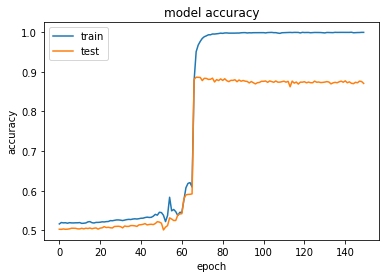

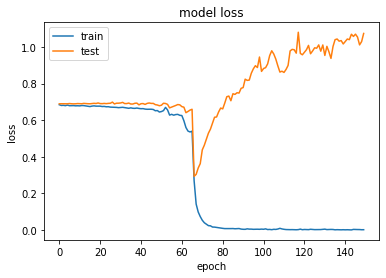

In [37]:
graph(history)

We can see that as the number of epochs increases, the loss remains flat till around 65 epochs when the validation loss drops to around 0.34. We then see the model start to overfit after 70 epochs as the train loss decreases and the validation loss increases. We will re-train the model for 70 epochs and also see the impact of changing the constraint from max_norm to unit_norm. We will also add an additional Dropout layer between the two fully-connected layers

Model 2 - LSTM 2nd attempt

In [38]:
embed_dim = 128
lstm_out = 196

model_1D = Sequential()

model_1D.add(Embedding(vocab_size, embed_dim,input_length = x_train.shape[1]))
model_1D.add(SpatialDropout1D(0.4))
model_1D.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2,kernel_constraint=unit_norm(),
               recurrent_constraint=unit_norm(),
               bias_constraint=unit_norm()))
model_1D.add(Dense(100, activation='relu'))
model_1D.add(Dropout(0.2))
model_1D.add(Dense(1, activation='sigmoid'))
model_1D.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_1D.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 300, 128)          1280000   
_________________________________________________________________
spatial_dropout1d_13 (Spatia (None, 300, 128)          0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_15 (Dense)             (None, 100)               19700     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 1,554,601
Trainable params: 1,554,601
Non-trainable params: 0
___________________________________________

In [40]:
epochs = 70
batches = 100
history1 = model_1D.fit(x_train, y_train, epochs=epochs, batch_size=batches, callbacks=[time_callback], validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/70
20000/20000 [==============================] - 51s 3ms/step - loss: 0.4061 - accuracy: 0.8227 - val_loss: 0.4475 - val_accuracy: 0.7920
Epoch 2/70
20000/20000 [==============================] - 51s 3ms/step - loss: 0.3535 - accuracy: 0.8558 - val_loss: 0.4315 - val_accuracy: 0.8038
Epoch 3/70
20000/20000 [==============================] - 51s 3ms/step - loss: 0.3263 - accuracy: 0.8673 - val_loss: 0.4867 - val_accuracy: 0.7634
Epoch 4/70
20000/20000 [==============================] - 50s 2ms/step - loss: 0.2825 - accuracy: 0.8891 - val_loss: 0.4368 - val_accuracy: 0.8038
Epoch 5/70
20000/20000 [==============================] - 50s 3ms/step - loss: 0.2882 - accuracy: 0.8814 - val_loss: 0.4687 - val_accuracy: 0.7976
Epoch 6/70
20000/20000 [==============================] - 51s 3ms/step - loss: 0.2622 - accuracy: 0.8967 - val_loss: 0.4338 - val_accuracy: 0.8074
Epoch 7/70
20000/20000 [==============================] - 50s 3ms/ste

While the training loss is 0.0097, the validation loss is around 1.7. This still implies overfitting. We will try to go back to our initial parameters for the model while removing one dense layer and the dropout layer on the same

Model 3 - LSTM 3rd attempt - resetting to original parameters and reducing number of dense / fully connected layers

In [26]:
embed_dim = 128
lstm_out = 196

model_4 = Sequential()
model_4.add(Embedding(vocab_size, embed_dim,input_length = x_train.shape[1]))
model_4.add(SpatialDropout1D(0.4))
model_4.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2,kernel_constraint=max_norm(3),
               recurrent_constraint=max_norm(3),
               bias_constraint=max_norm(3)))
model_4.add(Dense(1, activation='sigmoid'))
model_4.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_4.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 128)          1280000   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 300, 128)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 197       
Total params: 1,534,997
Trainable params: 1,534,997
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
epochs = 10
batches = 100
history4 = model_4.fit(x_train, y_train, epochs=epochs, batch_size=batches, callbacks=[time_callback], validation_split=0.3)

Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 48s 3ms/step - loss: 0.5838 - accuracy: 0.6831 - val_loss: 0.4717 - val_accuracy: 0.7757
Epoch 2/10
17500/17500 [==============================] - 48s 3ms/step - loss: 0.4058 - accuracy: 0.8269 - val_loss: 0.4756 - val_accuracy: 0.7789
Epoch 3/10
17500/17500 [==============================] - 48s 3ms/step - loss: 0.3869 - accuracy: 0.8386 - val_loss: 0.4103 - val_accuracy: 0.8231
Epoch 4/10
17500/17500 [==============================] - 49s 3ms/step - loss: 0.3110 - accuracy: 0.8741 - val_loss: 0.4036 - val_accuracy: 0.8337
Epoch 5/10
17500/17500 [==============================] - 48s 3ms/step - loss: 0.2808 - accuracy: 0.8891 - val_loss: 0.4687 - val_accuracy: 0.8360
Epoch 6/10
17500/17500 [==============================] - 48s 3ms/step - loss: 0.3008 - accuracy: 0.8790 - val_loss: 0.4673 - val_accuracy: 0.8005
Epoch 7/10
17500/17500 [==============================] - 48s 3ms/ste

The initial validation losss is less. However, the overall validation loss still increases steadily as number of epochs increases

Model 4 - GRU

In [30]:
from keras.layers import GRU
from keras import regularizers

In [31]:
embed_dim = 128

model_GRU_2D = Sequential()
model_GRU_2D.add(Embedding(vocab_size, embed_dim,input_length = x_train.shape[1]))
model_GRU_2D.add(SpatialDropout1D(0.4))
model_GRU_2D.add(GRU(128,kernel_regularizer=regularizers.l2(0.01),
                      bias_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.01),
                      activity_regularizer=regularizers.l2(0.01), kernel_constraint='max_norm',
                      bias_constraint='max_norm', recurrent_constraint='max_norm'))     
model_GRU_2D.add(Dense(1, activation='sigmoid'))
model_GRU_2D.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_GRU_2D.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 300, 128)          1280000   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 300, 128)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 1,378,817
Trainable params: 1,378,817
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
epochs = 10
batches = 128
history_GRU_2D = model_GRU_2D.fit(x_train, y_train, epochs=epochs, batch_size=batches, callbacks=[time_callback], validation_split=0.3)

Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 38s 2ms/step - loss: 1.4160 - accuracy: 0.6075 - val_loss: 0.6992 - val_accuracy: 0.6540
Epoch 2/10
17500/17500 [==============================] - 37s 2ms/step - loss: 0.6328 - accuracy: 0.7527 - val_loss: 0.6333 - val_accuracy: 0.7221
Epoch 3/10
17500/17500 [==============================] - 38s 2ms/step - loss: 0.5435 - accuracy: 0.8200 - val_loss: 0.6218 - val_accuracy: 0.7360
Epoch 4/10
17500/17500 [==============================] - 38s 2ms/step - loss: 0.4809 - accuracy: 0.8586 - val_loss: 0.5655 - val_accuracy: 0.7928
Epoch 5/10
17500/17500 [==============================] - 39s 2ms/step - loss: 0.4279 - accuracy: 0.8837 - val_loss: 0.5478 - val_accuracy: 0.7755
Epoch 6/10
17500/17500 [==============================] - 38s 2ms/step - loss: 0.4062 - accuracy: 0.8955 - val_loss: 0.6024 - val_accuracy: 0.7689
Epoch 7/10
17500/17500 [==============================] - 38s 2ms/ste

In [33]:
history_GRU_2D = model_GRU_2D.fit(x_train, y_train, epochs=2, batch_size=128, callbacks=[time_callback], validation_split=0.3)

Train on 17500 samples, validate on 7500 samples
Epoch 1/2
17500/17500 [==============================] - 37s 2ms/step - loss: 0.3105 - accuracy: 0.9306 - val_loss: 0.6492 - val_accuracy: 0.7596
Epoch 2/2
17500/17500 [==============================] - 37s 2ms/step - loss: 0.2909 - accuracy: 0.9375 - val_loss: 0.6416 - val_accuracy: 0.7501


In [44]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve

For LTSM model:

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


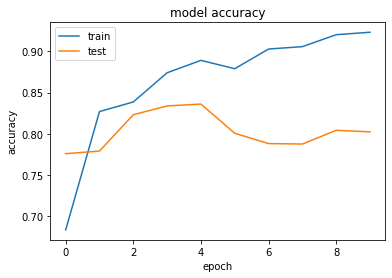

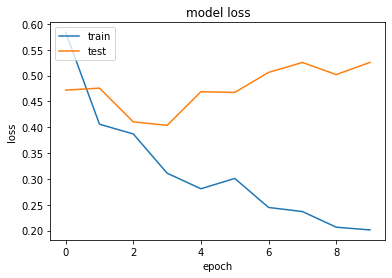

25000/25000 [==============================] - 81s 3ms/step
Accuracy of the model on test set is: 0.8011599779129028
Score of the model on test set is: 0.6145713401985169


In [60]:
print('\033[1mFor LTSM model:\n')
graph(history4)
score,acc = model_4.evaluate(x_test, y_test)
print('Accuracy of the model on test set is:',acc)
print('Score of the model on test set is:',score)
y_pred = model_4.predict_classes(x_test)
y_proba = model_4.predict_proba(x_test)

In [46]:
print('\033[1mTesting accuracy:\033[0m %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print('\033[1mClassification report:\033[0m\n %s' % (classification_report(y_test, y_pred)))

Testing accuracy: 80.12%
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80     12500
           1       0.80      0.80      0.80     12500

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000



For GRU model:

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


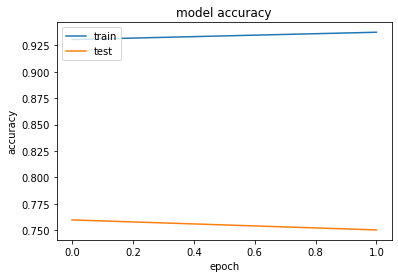

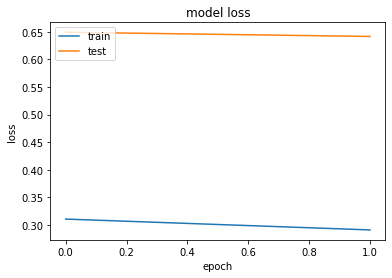

25000/25000 [==============================] - 85s 3ms/step
Accuracy of the model on test set is: 0.7531200051307678
Score of the model on test set is: 0.5981410307502747
Testing accuracy: 75.31%
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.76     12500
           1       0.78      0.71      0.74     12500

    accuracy                           0.75     25000
   macro avg       0.76      0.75      0.75     25000
weighted avg       0.76      0.75      0.75     25000



In [47]:
print('\033[1mFor GRU model:\n')
graph(history_GRU_2D)
score,acc = model_GRU_2D.evaluate(x_test, y_test)
print('Accuracy of the model on test set is:',acc)
print('Score of the model on test set is:',score)
y_pred = model_GRU_2D.predict_classes(x_test)
y_proba = model_GRU_2D.predict_proba(x_test)
print('\033[1mTesting accuracy:\033[0m %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print('\033[1mClassification report:\033[0m\n %s' % (classification_report(y_test, y_pred)))

Hence, based on the above, we can use model4 aka the LTSM model as the final model with an f1-score of 80%

## Retrive the output of each layer in keras for a given single test sample from the trained model you built

In [51]:
model_out=model_4
r=np.random.choice([len(sequence) for sequence in x_test])
sample=x_test[r]
print(r, sample)

300 [7758   41   15   29    9   57 1207   11 2909 4159 4443    8  387   41
  157   11    4    2 2720   21    4   52 1042  203   24   30   37   59
  186   10   10    4 9154    7    2 1687 1284  988    2    6  606 2971
  506  132   37   16  236 1440    7    2 2100 3864    6  255   37  738
   35 1158    8 5096   41   17   59    2   33    2    2   40    6 6854
 1738 9878    2    6 1113  231 8236  400  269    8 2114    4 1214  896
    7 4014 6452    2    2    2 4926 8351    6 1279    2   37   43  494
    8   30  447    5    2   33  101  132   59 1085 6313 3934  129  801
  420    7 1631   37 1481 3954    4 3001    7  325   10   10    4   22
  287    2    2 4874    7  620    4 8272   19 3498    4 4835    8    2
  879   19    4 3594    8   32 4340  209 9560 2783   83  888    5   24
    8  760    4  192   15 2402    9  131 1668    8 1135  187  466   43
    2  884    2   19   35 6526    5   51  618  575    8  884    2 3795
 2680   10   10 5237 1700 1278   11 1157    9    6  176    7  253   48
  

In [57]:
import keras.backend as K

In [59]:
outputs = [layer.output for layer in model_out.layers]                  
function = K.function([model_out.input, K.learning_phase()], outputs)   
    
if sample.any():
    layer_outs = function([np.array([sample,]), 1.])
    for idx, out in enumerate(layer_outs):
        print('\033[1mLayer# :', idx + 1)
        print('\033[1mName   :', model_out.layers[idx].name)
        print('\033[1mShape  : ' + str(out.shape) + '\033[0m')
        print(out)

Layer# : 1
Name   : embedding_4
Shape  : (1, 300, 128)
[[[-3.39768198e-03 -5.99778928e-02 -1.02059832e-02 ... -9.89555717e-02
   -4.83304299e-02  5.14481328e-02]
  [ 9.13109351e-03 -5.30979149e-02  1.13594703e-01 ...  1.00790679e-01
    2.43114214e-02  5.62718080e-04]
  [ 4.51706001e-05 -1.90327018e-02 -6.82693720e-02 ...  4.03515138e-02
   -5.23903295e-02 -2.31852233e-02]
  ...
  [ 6.17519096e-02 -4.68253531e-02 -3.01409364e-02 ... -4.07980010e-02
    9.16740075e-02  1.34074287e-02]
  [ 8.98766518e-02  5.16704656e-02  3.87675911e-02 ... -2.28421018e-02
   -5.85004501e-02 -2.47436315e-02]
  [-5.83562031e-02 -1.44010037e-03  5.90077508e-03 ... -1.29804965e-02
    2.99404990e-02  1.30804200e-02]]]
Layer# : 2
Name   : spatial_dropout1d_3
Shape  : (1, 300, 128)
[[[-5.6628031e-03 -9.9963151e-02 -1.7009972e-02 ... -1.6492595e-01
   -0.0000000e+00  8.5746884e-02]
  [ 1.5218489e-02 -8.8496521e-02  1.8932450e-01 ...  1.6798446e-01
    0.0000000e+00  9.3786343e-04]
  [ 7.5284333e-05 -3.1721167e-